# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #импортируем библиотеку пандас как pd
import matplotlib.pyplot as plt #импортируем matplotlib как plt
import seaborn as sns #импортируем библиотеку seaborn как sns
data = pd.read_csv('/Users/artemmm/Downloads/real_estate_data.csv', sep ='\t')#в переменную data записываем наш датасет
data.head()#смотрим на датасет (вдруг что-то криво импортировалось)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
print(data.info())#изучаем информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

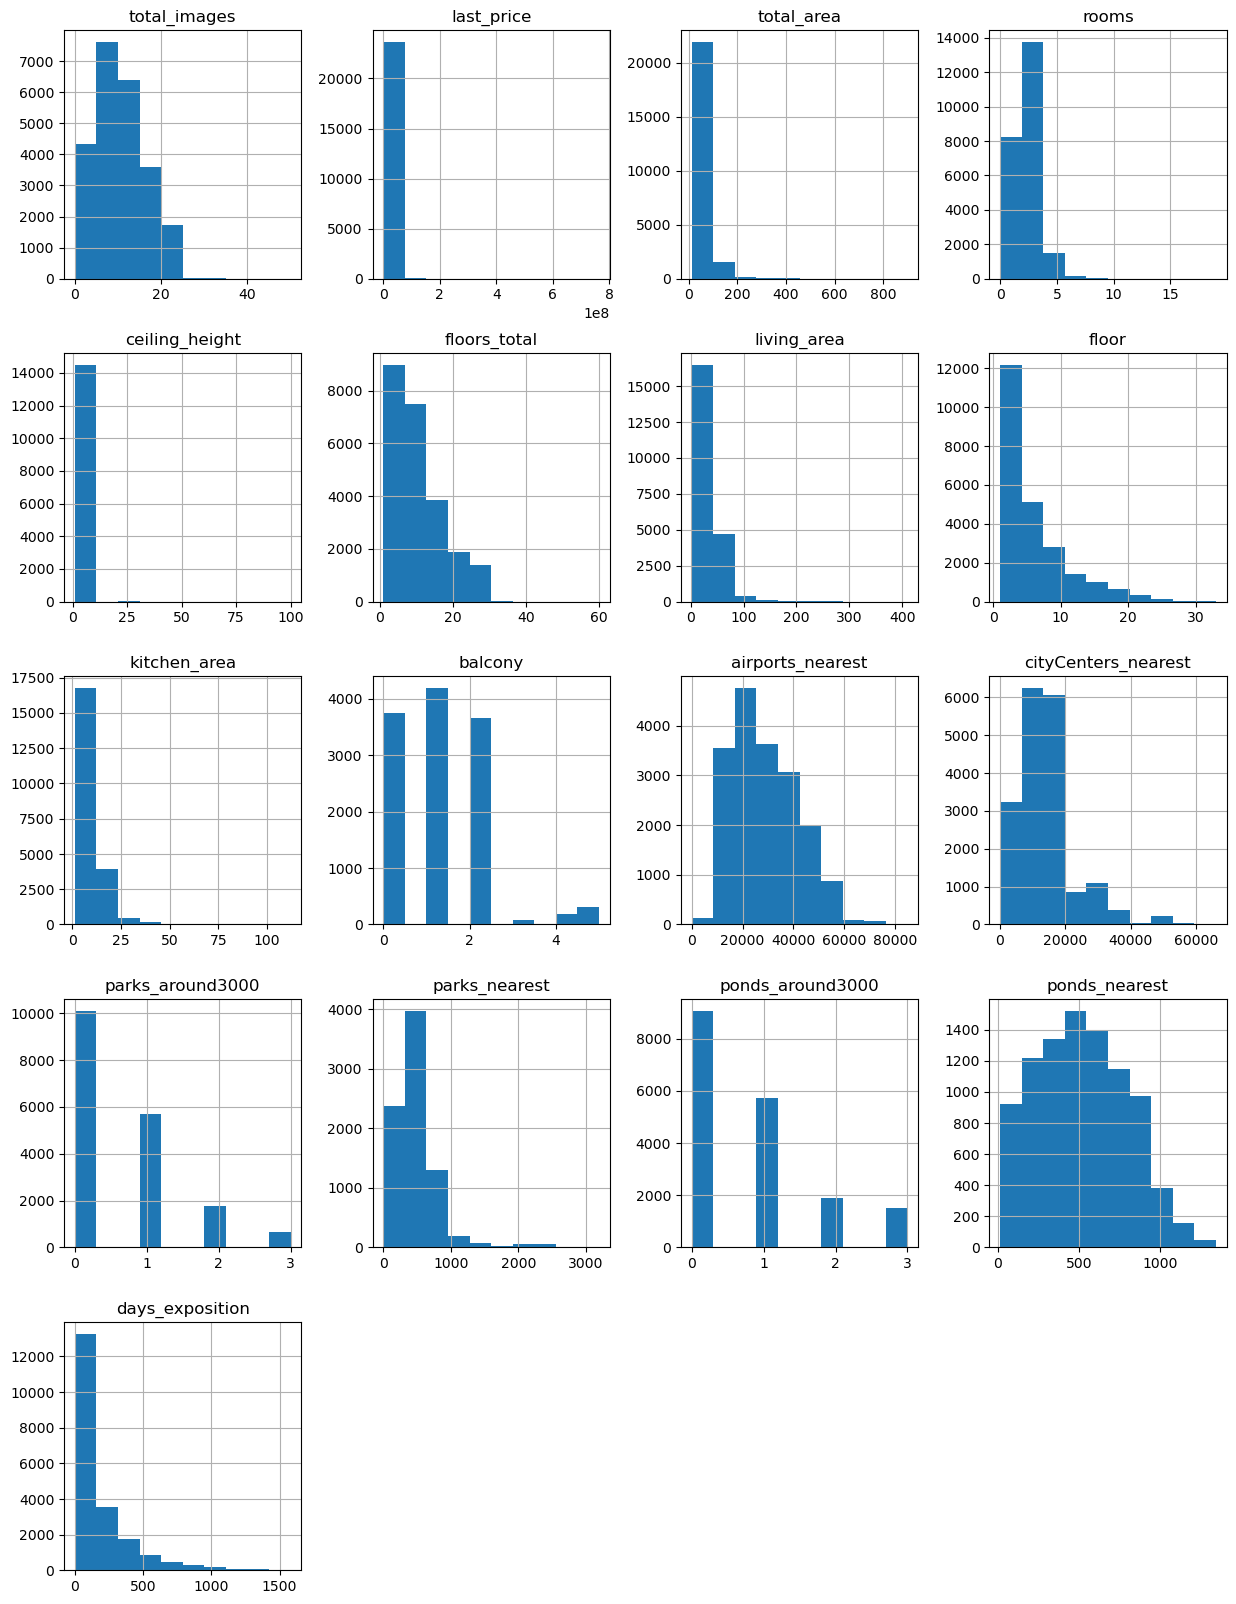

In [3]:
data.hist(figsize = (15,20)); #строим гистограмму для всех стобцов, чтобы изучить данные

<div class="alert-info">
<b>Из этих данных можно подметить, что столбец "is_apartment" имеет тип 'object', хотя там должен быть тип 'boolean' (True or False). А также некоторые столбцы имеют тип float64, но по логике должен быть тип int, например, столбец 'floors_total', не бывает 1.5 этаж или 6.3, тут может использоваться только целочисленный тип данных, и это подозрительно.</b>
</div>

<Axes: >

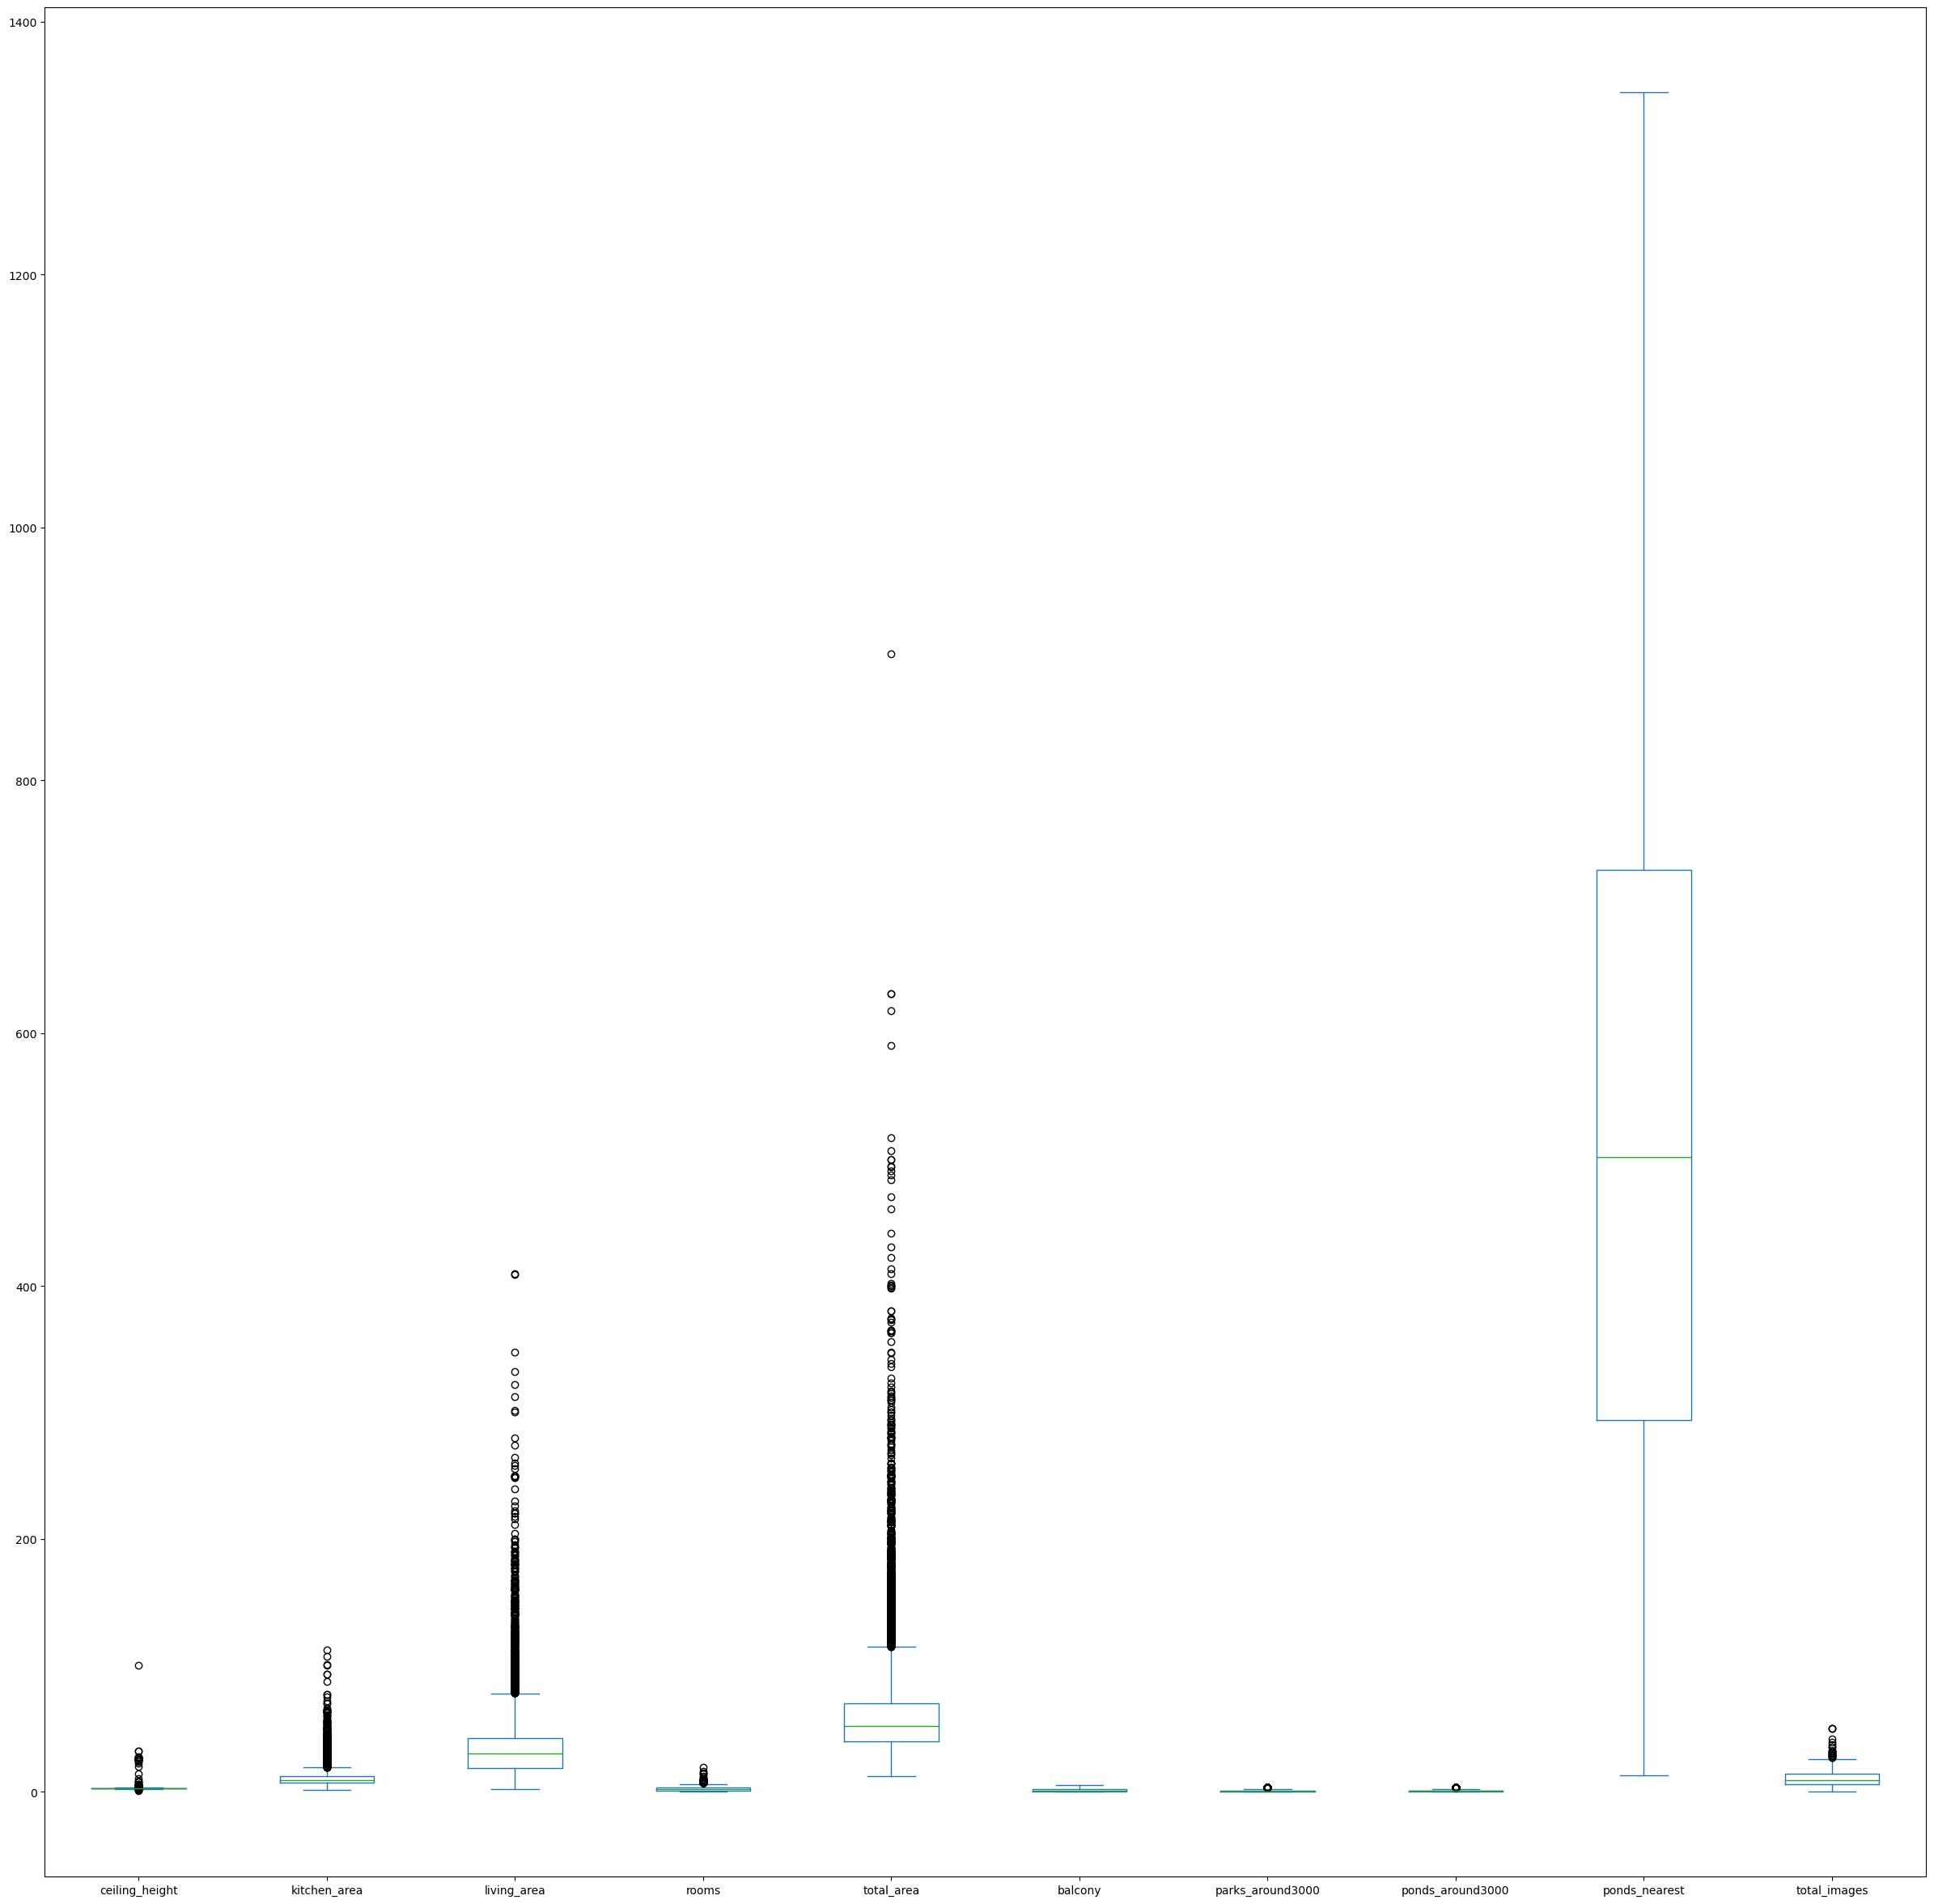

In [4]:
columns_boxplot = ['ceiling_height', 'kitchen_area', 'living_area', 'rooms', 'total_area', 'balcony', 'parks_around3000', 'ponds_around3000', 'ponds_nearest', 'total_images']
data[columns_boxplot].plot(kind = 'box', figsize = (30,30))


<div class="alert-info">
<b>
На ящиках с усами видно множество выбросов, с которыми мне еще предстоит поработать</b>
</div>

### Предобработка данных

In [5]:
for column in data:
    print(column, data[column].isna().sum()) #находим количество пропусков во всех столбцах
data_new = data
data_new['balcony'] = data_new['balcony'].fillna(0) #пропуски в столбце балконы, скорее всего, означают что балконов нет
data_new['ponds_around3000'] = data_new['ponds_around3000'].fillna(0) #пропуски в столбце 'количество водоемов в радиусе 3000' 
#метров, скоее всего, означают, что водоемов рядом нет


total_images 0
last_price 0
total_area 0
first_day_exposition 0
rooms 0
ceiling_height 9195
floors_total 86
living_area 1903
floor 0
is_apartment 20924
studio 0
open_plan 0
kitchen_area 2278
balcony 11519
locality_name 49
airports_nearest 5542
cityCenters_nearest 5519
parks_around3000 5518
parks_nearest 15620
ponds_around3000 5518
ponds_nearest 14589
days_exposition 3181


<Axes: >

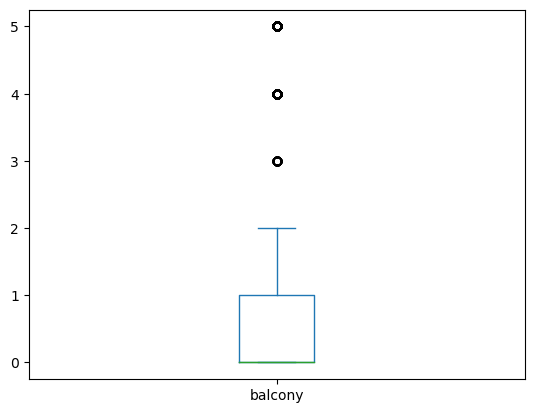

In [6]:
data_new['balcony'].plot(kind = 'box') #смотрим выбросы в этом столбце, значения реальны.


<div class="alert-info">
<b>Значения в колонке "balcony" могут быть пропущены, допустим, если продавец не указал количество в причину отсуствия балконов, поэтому меняем пропуски на 0.
    
Значения в колонке 'ponds_around3000' могут быть пропущены, если в данном радиусе нет водоёмов, поэтому я их поменял на значения 0
  
''</b>
</div>


<div class="alert-info">
<b>Затем я измерил расстояние на Яндекс.Картах от дальней точки питера до центра, и увидел, что больше чем 55км это уже область, поэтому можно повозиться с пропусками в колонке 'living_area' (название жилого пункта), которых 1903, чтобы заменить названия либо на "Санкт-Петербург", либо "Область"</b>
</div>

In [7]:
print(data_new[data_new['cityCenters_nearest'] > 55000]['living_area'].isnull().sum())

0



<div class="alert-info">
<b>К моему сожалению, 0 квартир, имеюших пропуски в столбце 'living_area', имеют расстояние до города более 55 километров, поэтому ничего не делаем.
    
Следующим шагом я хочу убрать "мусорные значения", которые нам показал .boxplot()</b>
</div>

<Axes: >

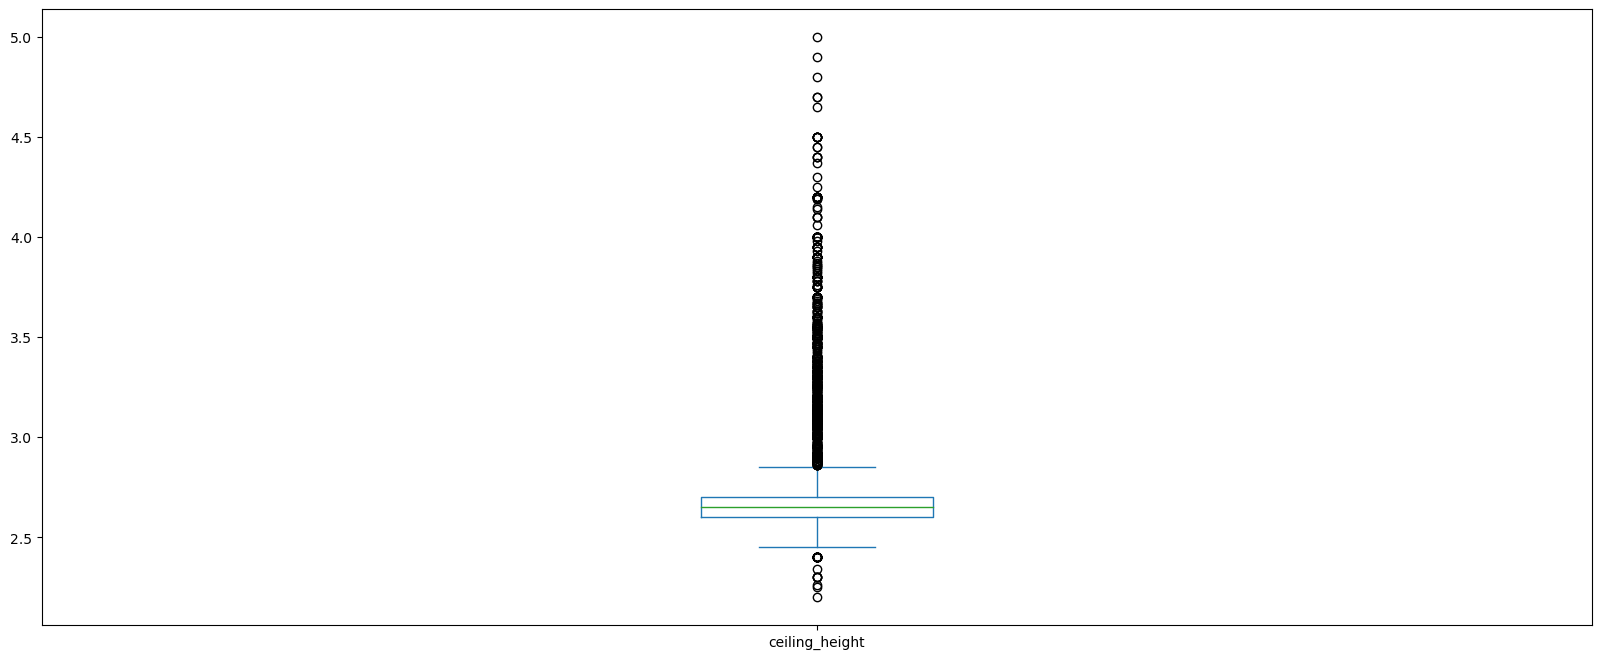

In [8]:
data_new['ceiling_height'] = data_new['ceiling_height'].fillna(data_new['ceiling_height'].median())#пропущенные значения меняем на медианные, тк примерно потолки везде одинаковы
data_new = data_new.astype({'ceiling_height':'float64'})#меняем тип столбца
data_new.loc[data_new['ceiling_height'] > 5, 'ceiling_height'] = data_new.loc[(data_new['ceiling_height'] > 20) & (data_new['ceiling_height'] < 50), 'ceiling_height'] / 10
data_new = data_new[data_new['ceiling_height'] > 2]
data_new['ceiling_height'].plot(kind = 'box',figsize=(20,8)) #смотрим на ящик с усами столбца с высотой потолков

<div class="alert-info">
<b>Ящик с усами показал мне множество значений, которые выше чем 3м., обычно люди не строят потолки выше, следовательно, с данными что-то не так. Логично предположить, что значения 32м. это 3.2м. Делю все значения, что выше 50м. и меньше 30м. на 10. Значения больше 50м считаем выбросами, поэтому их брать в срез не будем.
    
Парень, который со мной на этом курсе, сказал, что у них в Питере 5м. потолки - реально. Поэтому я и обозначил 5м - лимит высоты потолка.</b>
</div>

<div class="alert-info">
<b>Думаю, что такие значения нас вполне устраивают</b>
</div>

322
Axes(0.125,0.11;0.775x0.77)


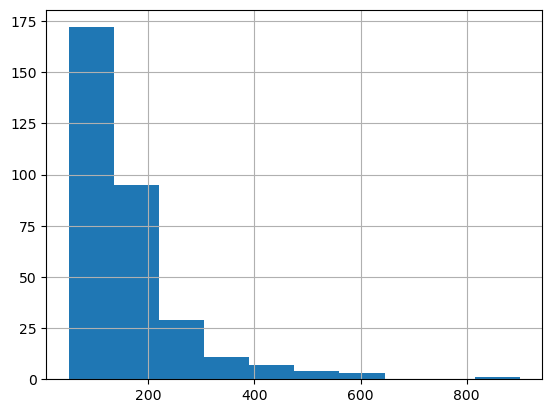

In [9]:
print(data_new[data_new['kitchen_area'] > 30]['kitchen_area'].count()) #сколько квартир с кухнями больше 30кв.м
print(data_new[(data_new['kitchen_area'] > 30)]['total_area'].hist())

<div class="alert-info">
<b>Всего 323 квартиры имеют площадь кухни больше 30м2, и изучив датасет, я увидел, что все из них имеют большое значение 'total_area', поэтому, я посчитал значения реальными, и удалять их не стал</b>
</div>

1.3


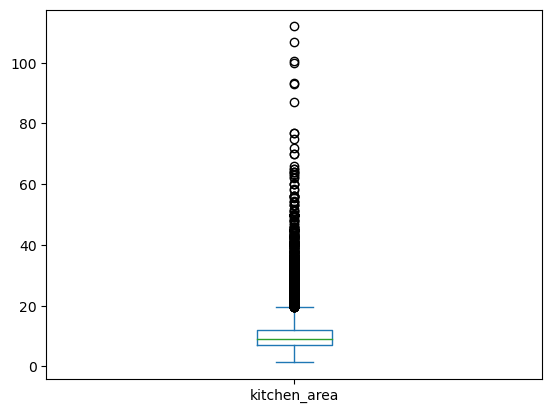

In [10]:
data_new['kitchen_area'].plot(kind = 'box') #смотрим максимальное и минимальное значение площади кухни
print(data_new['kitchen_area'].min())

<div class="alert-info">
<b>Живу в небольшом городе, и бывают ли кухни 1 кв/м - не знаю. У моей бабушки кухня 2м2, думаю, бывают и меньше. Так как в Питере бывают действительно тесные коммуналки, не исключаю, что и кухня в 1 кв.м у кого-то есть, тем более, что только одна квартира с таким значением, поэтому убирать не стал :) 
    
Объектов с кухней больше 80 кв.м. очень мало, поэтому я их удалил.</b>
</div>

count    21771.000000
mean        34.442407
std         21.979481
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

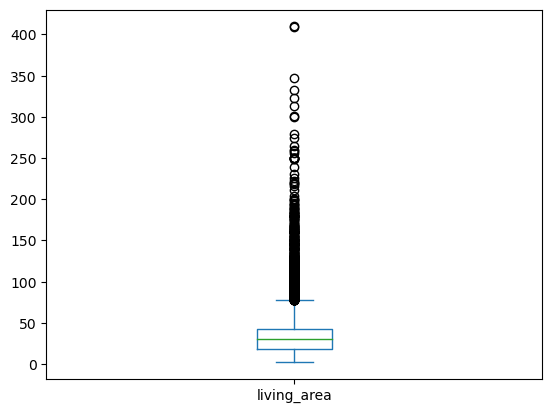

In [11]:
data_new['living_area'].plot(kind = 'box')
data_new['living_area'].describe()


<div class="alert-info">
<b>Больше 200 кв.м. квартир мало, удалил их.

По поводу минимального значения - квартира с жил. площадью 2 кв.м. в Китае люди привыкли жить в таких квартирах, думаю, что в таком большом городе, как Санкт-Петербург может быть парочка и таких квартир, поэтому считать это выбросом не стал, тем более таких квартир довольно мало.  </b>
</div>

In [12]:
data_new['parks_around3000'].describe()

count    18162.000000
mean         0.610781
std          0.801532
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


<div class="alert-info">
<b>Со значениями этого столбца все в порядке, кроме типа данных, поэтому...
    
На этом месте я решил вернуться к исправлению типов столбцов, отложив выбросы, мы к ним еще вернемся :) </b>
</div>

In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23670 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23670 non-null  int64  
 1   last_price            23670 non-null  float64
 2   total_area            23670 non-null  float64
 3   first_day_exposition  23670 non-null  object 
 4   rooms                 23670 non-null  int64  
 5   ceiling_height        23670 non-null  float64
 6   floors_total          23584 non-null  float64
 7   living_area           21771 non-null  float64
 8   floor                 23670 non-null  int64  
 9   is_apartment          2772 non-null   object 
 10  studio                23670 non-null  bool   
 11  open_plan             23670 non-null  bool   
 12  kitchen_area          21399 non-null  float64
 13  balcony               23670 non-null  float64
 14  locality_name         23621 non-null  object 
 15  airports_nearest      18

<div class="alert-info">
<b>Столбцы:is_apartment (апартаменты)(object); balcony (кол-во балконов)(float); parks_around3000 и ponds around3000 имеют типы (float); days_exposition (дней на обьявлении)(float) имеют неверные типы, которые нужно изменить</b>
</div>

In [14]:
data_new['parks_around3000'] = data_new['parks_around3000'].fillna(0)#пропуски могут означать отсутствие парков
data_new['ponds_around3000'] = data_new['ponds_around3000'].fillna(0)#пропуски могут означать отсутствие водоемов
data_new['days_exposition'] = data_new['days_exposition'].fillna(-1)#ставим заглушки на столбец, чтобы не удалять всю строку
data_new['floors_total'] = data_new['floors_total'].fillna(-1) #неизвестно
data_new = data_new.astype({'is_apartment':'bool', 'balcony':'int64', 'parks_around3000':'int64', 'ponds_around3000':'int64', 'days_exposition':'int64', 'floors_total':'int64'})
#выше поменял тип столбцов
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23670 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23670 non-null  int64  
 1   last_price            23670 non-null  float64
 2   total_area            23670 non-null  float64
 3   first_day_exposition  23670 non-null  object 
 4   rooms                 23670 non-null  int64  
 5   ceiling_height        23670 non-null  float64
 6   floors_total          23670 non-null  int64  
 7   living_area           21771 non-null  float64
 8   floor                 23670 non-null  int64  
 9   is_apartment          23670 non-null  bool   
 10  studio                23670 non-null  bool   
 11  open_plan             23670 non-null  bool   
 12  kitchen_area          21399 non-null  float64
 13  balcony               23670 non-null  int64  
 14  locality_name         23621 non-null  object 
 15  airports_nearest      18

<div class="alert-info">
<b>В предыдущем шаге я поменял типы столбцов, которые посчитал нужным исправить. Не бывает 1,5 парка возле дома, или пруда. Значения с расстоянием менять не стал, может же быть 1,5 метра до парка, поэтому оставил, как есть.
    
Возвращаемся к выбросам.</b>
</div>

<Axes: >

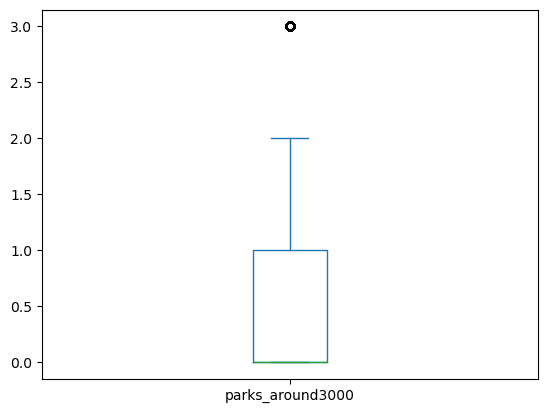

In [15]:

data_new['parks_around3000'].plot(kind = 'box')

In [16]:
data_new['rooms'].describe()

count    23670.000000
mean         2.070553
std          1.077898
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<Axes: >

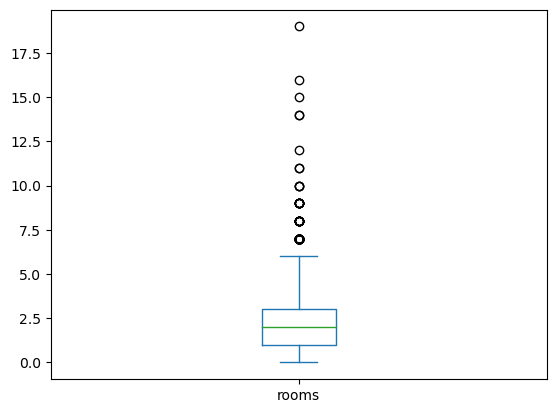

In [17]:
data_new['rooms'].plot(kind = 'box')

In [18]:
data_new.loc[data_new['rooms'] == 0, 'studio'] = True
data_new = data_new[data_new['rooms'] < 7]

<div class="alert-info">
<b>
Boxplot считает квартиры, в которых от 7 комнат - выбросами. Удалим их, так как их совсем мало.
    
По поводу 0 значений: их всего 196 штук. Скорее всего, так люди обозначали квартиры-студии, поэтому я записал на эти квартиры True в колонку 'studio'.</b>
</div>

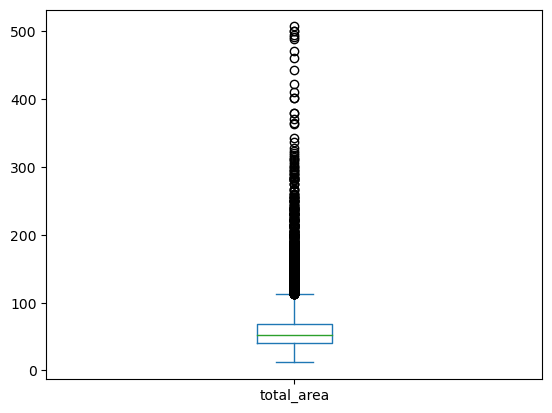

In [19]:
data_new['total_area'].plot(kind = 'box')
data_new = data_new[(data_new['total_area'] >= 14) & (data_new['total_area'] < 120)]

<div class="alert-info">
<b>Совсем мало недвижимости с площадью больше 400м2. Удалил все значения, что выше.
    
Минимальное значение - квартира на 12 кв.м. Нашел в интернете: "Самая дешевая мини-квартира Петербурга — это 14 квадратов в панельном доме на окраине в районе ж/д станции «Сосновая поляна»." поэтому значения меньше или равные 14 убираем.</b>
</div>

In [20]:
#data['locality_name'].sort_values().unique()
data_new['locality_name'] = data_new['locality_name'].str.lower() #без заглавных букв
data_new['locality_name'] = data_new['locality_name'].str.replace('поселок','посёлок')#меняем е на ё в слове посёлок
data_new['locality_name'].sort_values().unique()



array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской посёлок большая ижора',
       'городской посёлок будогощь', 'городской посёлок виллози',
       'городской посёлок лесогорский', 'городской посёлок мга',
       'городской посёлок назия', 'городской посёлок новоселье',
       'городской посёлок павлово', 'городской посёлок рощино',
       'городской посёлок свирьстрой', 'городской посёлок советский',
       'городской посёлок фёдоровское', 'городской посёлок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'дерев

<div class="alert-info">
<b>В шаге выше я заменил все буквы ё на е в слове посёлок. Удалил неявные дубликаты. </b>
</div>

<Axes: >

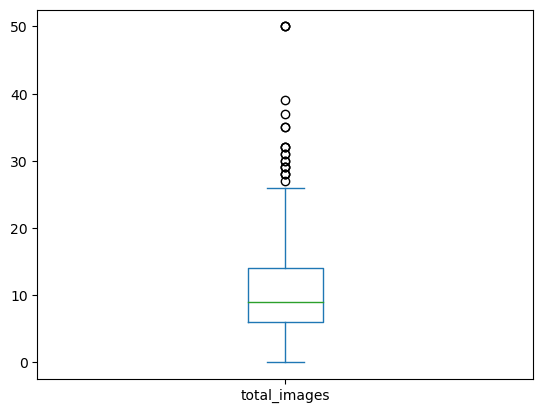

In [21]:
data_new['total_images'].plot(kind = 'box')

<Axes: >

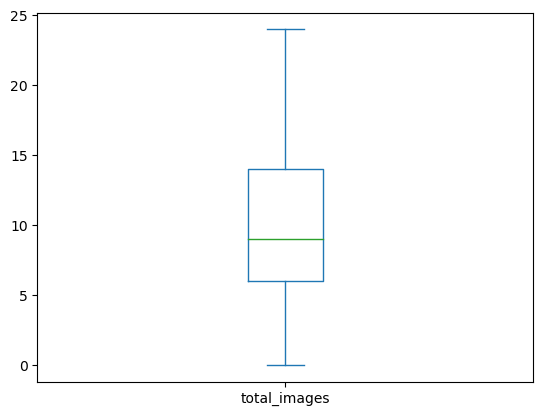

In [22]:
data_new['total_images'] = data_new['total_images'].fillna(data_new['total_images'].median())#заполняем медианными значениями пропуски
data_new = data_new[data_new['total_images'] < 26]
data_new['total_images'].plot(kind = 'box')

Объявлений с кол-вом фотографий больше 26 совсем мало, поэтому удаляю эти значения.

5488


<Axes: >

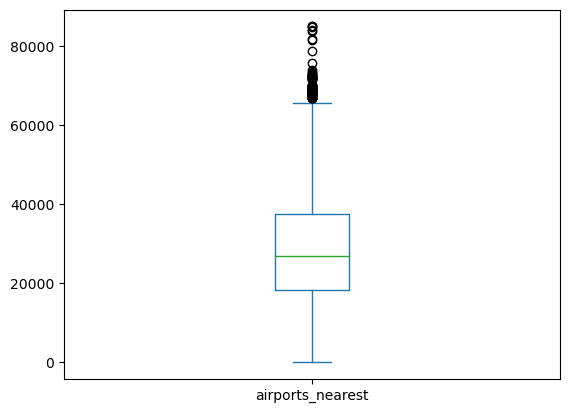

In [23]:
print(data_new['airports_nearest'].isna().sum())
data_new['airports_nearest'].plot(kind = 'box')

Выше я посчитал пропуски в столбце 'airports_nearest', решил, что их слишком много, поэтому удалять не стал, заменить нечем, тк значение индивидуальное.

По поводу выбросов - значения могут быть любые, поэтому удалять большие значения я не стал, думаю они нам не сильно помешают.

0


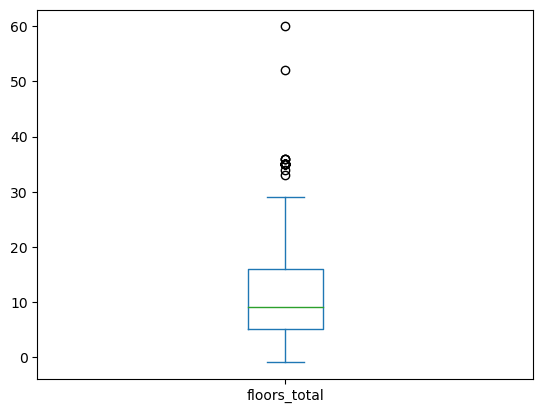

In [24]:
data_new['floors_total'].plot(kind = 'box')
print(data_new['floors_total'].isna().sum())

In [25]:
data_new = data_new[data_new['floors_total'] < 30]

объявлений с количеством этажей больше 50 - совсем мало, удалим их.

<div class="alert-info">
<b>Пропусков мало - удалять не стал. </b>
</div>

0.9133296763576523
0


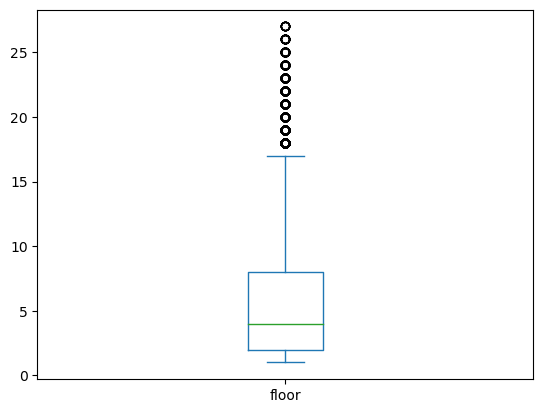

In [26]:
data_new[data_new['floor'] > data_new['floors_total']].count() #значений где один этаж выше другого нет - это хорошо
data_new['floor'].plot(kind = 'box')
data_new = data_new[data_new['floor'] < 18]
print(data_new.shape[0]/data.shape[0])
print(data_new['floor'].isna().sum())

<div class="alert-info">
<b>Значений с количеством этажей больше 18 совсем мало, удалил их. Объем данных уменьшился на 4% - приемлемо. Проверил бывают ли значения, где этаж > максимального этажа, таких значений нет (проверил и удалил, тк не хочу засорять код лишними подсчетами для вас)</b>
</div>

<Axes: >

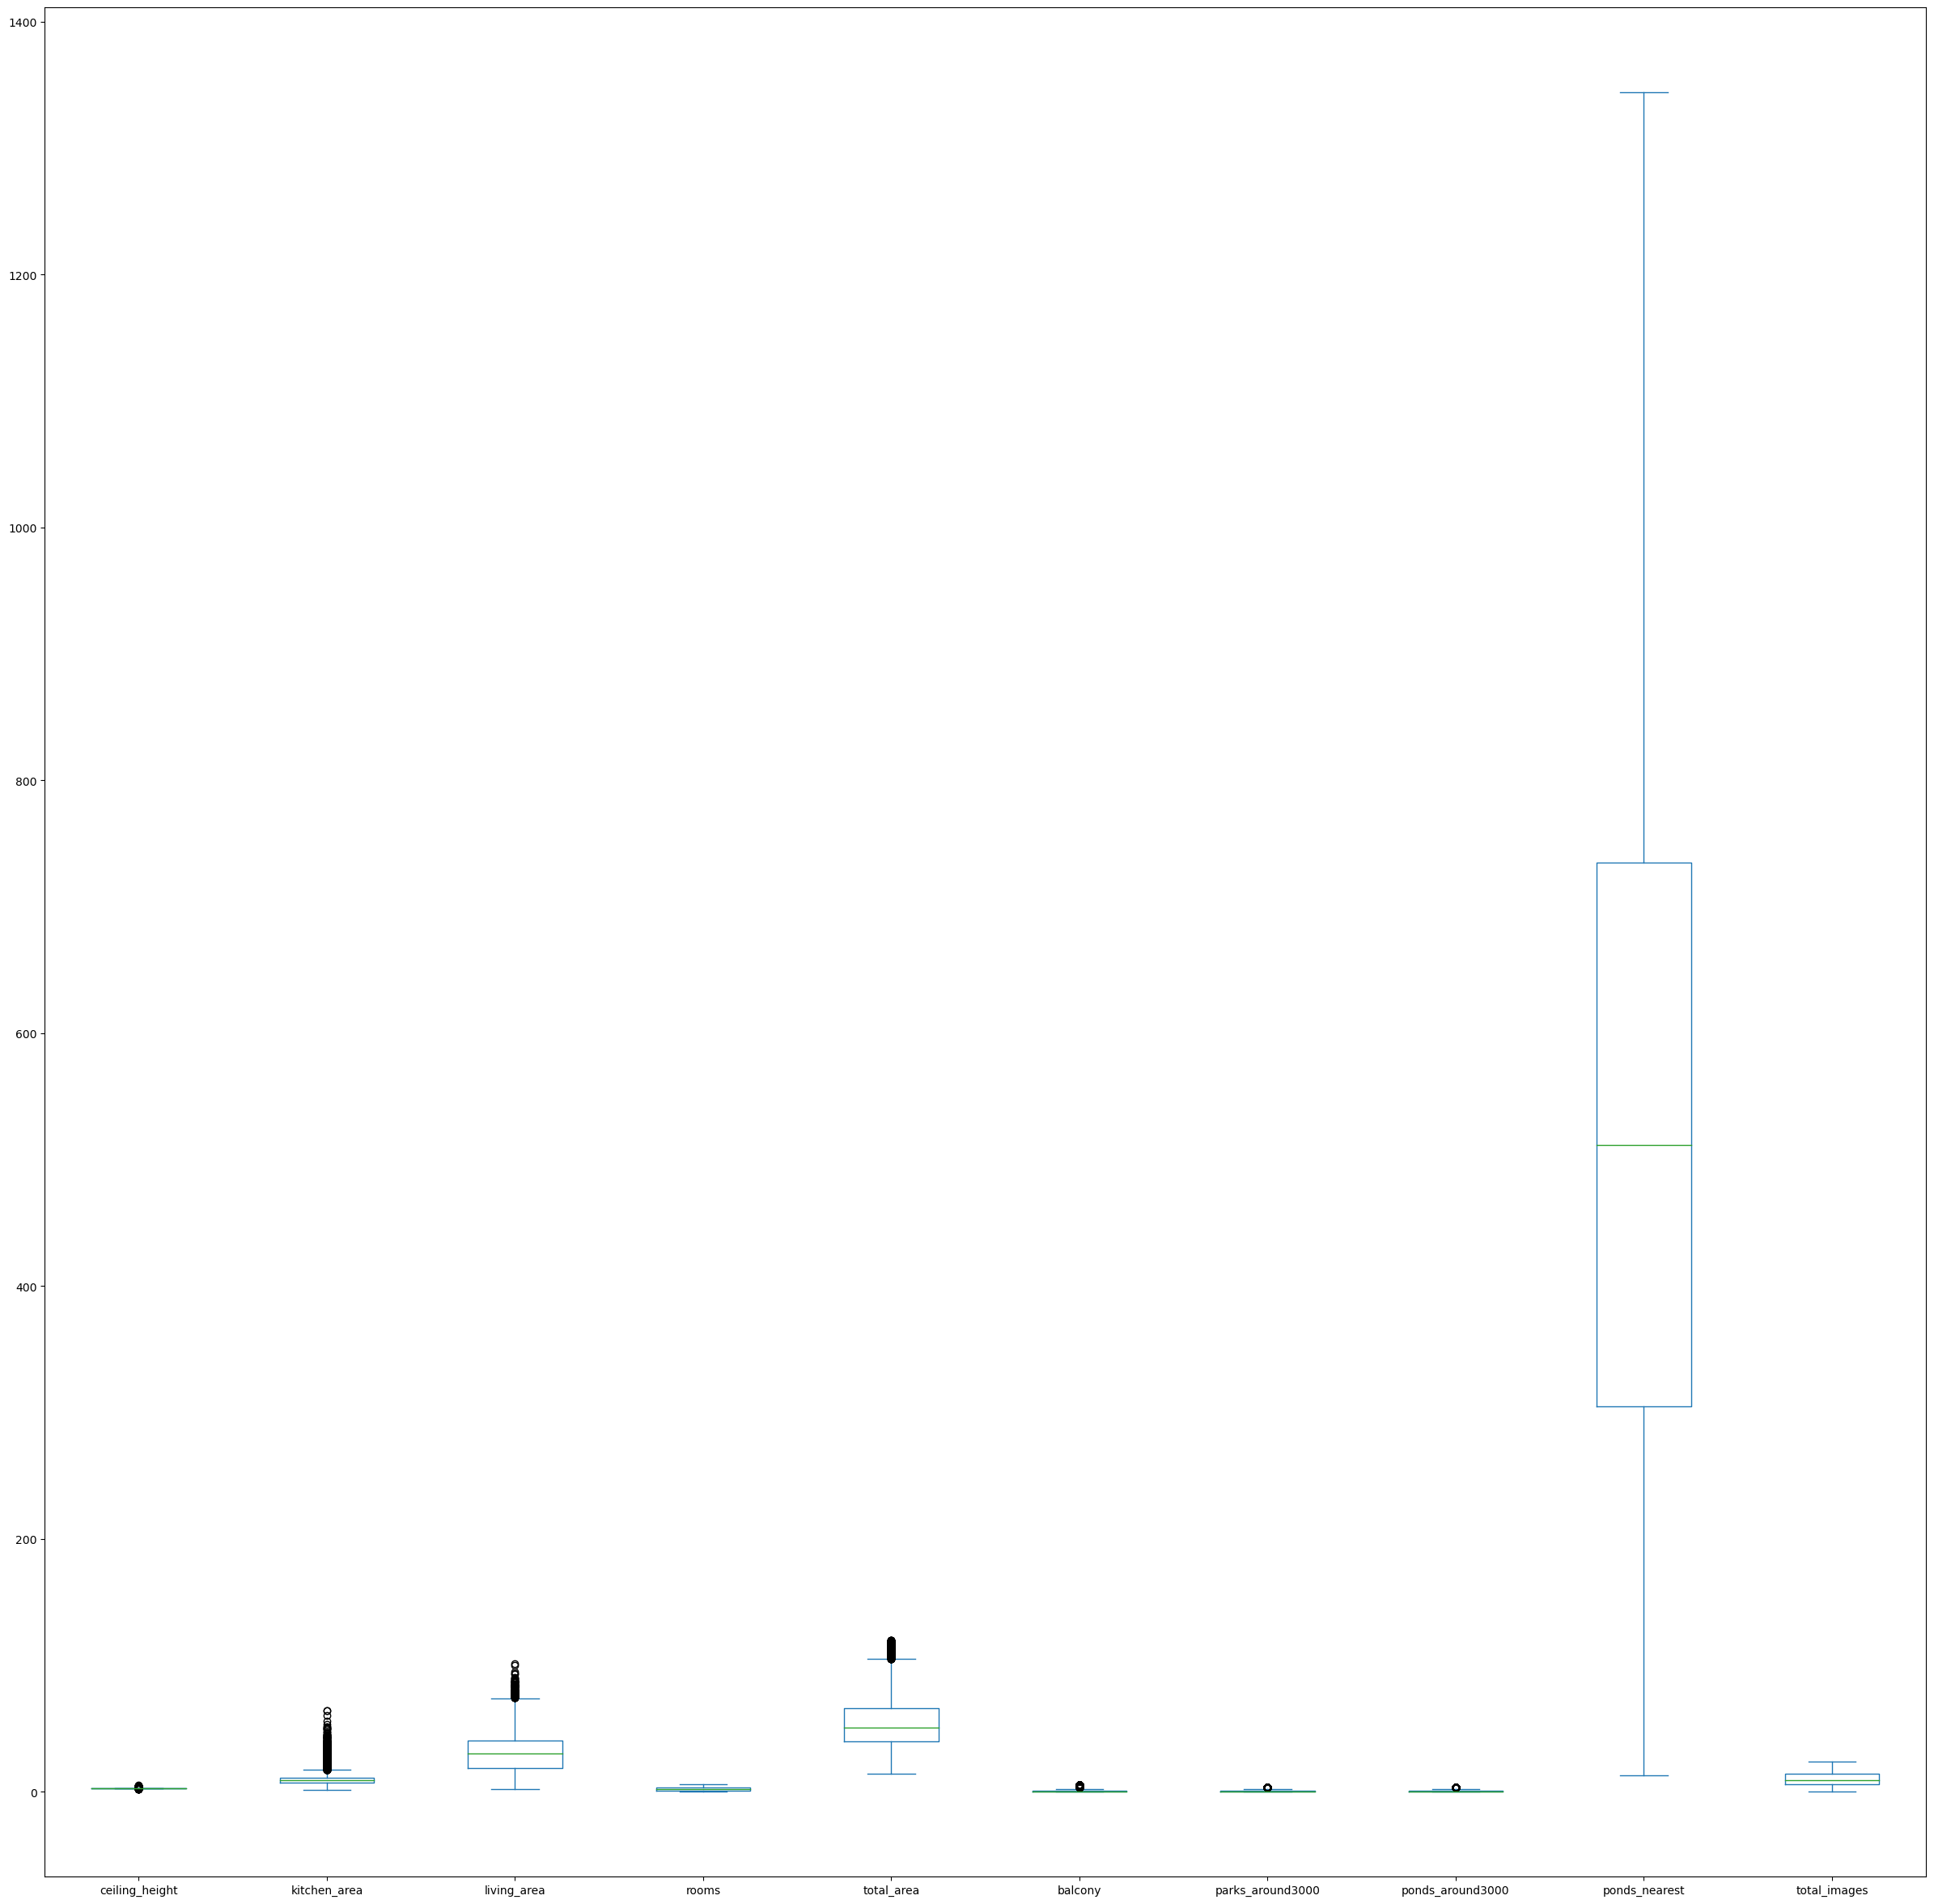

In [27]:
columns_boxplot = ['ceiling_height', 'kitchen_area', 'living_area', 'rooms', 'total_area', 'balcony', 'parks_around3000', 'ponds_around3000', 'ponds_nearest', 'total_images']
data_new[columns_boxplot].plot(kind = 'box', figsize = (30,30))


<Axes: >

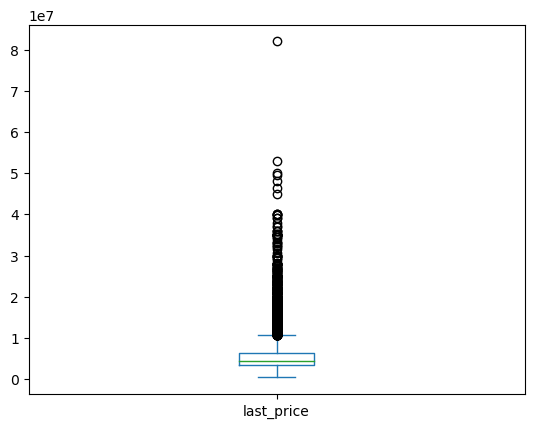

In [28]:
data_new['last_price'].plot(kind = 'box')

основной диапазон продажи квартир - до 100млн. Уберем все, что выше.

In [29]:
data_new = data_new[data_new['last_price'] < 20000000]

In [30]:
print(data_new.shape[0]/data.shape[0])
data = data_new

0.9063673572724588



<div class="alert-info">
<b>Все оставшиеся пропуски могли возникнуть по разным причинам, например, потери информации, некорректного ввода данных, или же из-за человеческого фактора. Остается только догадываться.</b>
    <p>
        Думаю, что пропуски в таких колонках, как "расстояние до ближайшего аэропорта/водоема/центра города" возникли из за того, что люди не вводят данные в эти колонки, если же поблизости нет никакого из запрашиваемых обьектов. Вряд-ли люди из маленьких населенных пунктов будут знать расстояние до аэропорта, который находится за 300км :) Возможно, таких людей всего 1%, а возможно все 100%, поэтому эти пропуски я удалять не стал. Также менять их на значение 0 не стал, это будет путать - 0 метров до аэропорта? Квартира в Пулково? Конечно нет, поэтому нельзя эти пропуски заменять другими значениями.
    
<p>
В колонке 'ceiling_height' невероятно много пропусков, я думаю, это потому, что не все люди знают размер до потолка, да и не все интересуются этим фактором при покупке квартиры, поэтому многие продавцы не оставляют никаких данных.    
    
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -    
</p>
<p>Столбец 'days_exposition' трогать не стал, не такая уж и важная информация, как по мне) 
        
Столбец 'ceiling_height' - заменил аномальные значения на нормальные. Удалил выбросы. Пропуски заполнил медианой.
    
Столбец 'ponds_nearest' - не трогал, ведь это частное значение для каждой квартиры.
        
Столбец 'parks_nearest' - не трогал, ведь это частное значение для каждой квартиры.

Столбец 'parks_around3000' - изменил тип столбца (был float64, сделал int64) (не бывает 1,4 парка возле дома) + пропуски заменил на 0, тк пропуск может означать, что поблизости нет парков.

Столбец 'ponds_around3000' - изменил тип столбца (был float64, сделал int64) (не бывает 3,4 водоёма возле дома) + пропуски заменил на 0, тк пропуск может означать, что поблизости нет водоемов.

Столбец 'kitchen_area' - изучил значения, отметил их реальными, поэтому менять ничего не стал. Пропуски заменить никак нельзя, тк мы никак не можем вычислить хотя бы примерный размер кухон с пропусками. Удалил квартиры с пропусками, тк это важный столбец.

Столбец 'living_area' - изучил значения, отметил их реальными, поэтому менять ничего не стал. Пропуски заменить никак нельзя, тк мы не можем вычислить хотя бы примерную размеру жил.площади. Удалил квартиры с пропусками, тк это важный столбец.

Столбец 'rooms' - изучил значения, квартир с комнатами больше 7 - мало, удалил. Квартиры с 0 значениями удалил, тк так скорее всего люди обозначали студии, пропусков в этом столбце не было.

Столбец 'total_area' - изучил значения, удалил выбросы (меньше 14 и больше 120). С пропущенными значениями мы ничего не можем сделать, тк нельзя даже примерно предугадать площадь квартиры. Удалил квартиры с пропусками, тк это важный столбец. 
    
Столбец 'balcony' - Изучил значения, отметил их реальными. Значения в этой колонке могут быть пропущены, допустим, если продавец не указал количество в причину отсуствия балконов, поэтому меняем пропуски на 0.
    
Столбец 'locality_name' - Изучил данные, заменил все неявные дубликаты.

Столбец 'total_images' - Изучил данные, удалил выбросы (от 26). Пропущенные значения заменил на медианные, тк в среднем люди загружают примерно одинаковое кол-во фотографий.
        
Столбец 'airports_nearest' - изучил данные, значения отметил реальными, тк истинность не проверишь - аэропорт может быть за 500 метров от квартиры, а может за 100000. Пропуски удалять не стал, тк квартир с пропусками слишком много. Медианными значениями их заполнить нельзя, тк для каждой квартиры значение индивидуальное.
     
Столбец 'cityCenters_nearest' - изучил данные, значения отметил реальными, тк истинность не проверишь - квартира может быть где угодно. Пропуски заменять ничем не стал, тк для каждой квартиры индивидуальное значение.
        
Столбец 'days_exposition' - изучил данные, значения отметил реальными, тк истинность не проверишь - может быть любое кол-во дней. Пропуски заменил на -1, сделал так называемые заглушки для того, чтобы изменить тип столбца на int64 с float64.
        
Столбец 'first_day_exposition' - ничего не делал. Истинность столбца никак не проверить, с пропусками ничего сделать нельзя.
        
Столбец 'floors_total' - изучил данные, редкие значения удалил (больше 30). Пропусков мало, удалять не стал.
        
Столбец 'floor' - изучил данные, удалил редкие значения (больше 18). Пропусков нет. 
        
Столбец 'is_apartment' - столбец имеет булев тип. Много пропусков (20000). Я посчитал, что трогать их не нужно. Возможно, продавцы пропускали этот параметр из-за того, что продавали дом. Но сомневаюсь, что из всей Питерской области в наших данных 20000 домов, поэтому заполнять пропуски не стал.
        
Столбец 'last_price' - изучил значения в столбце. Пропуски заменять не стал, тк для каждого обьекта цена индивидуальна. Удалил аномальные значения.
        
Столбец 'open_plan' - пропусков нет. Столбец имеет булев тип.
        
Столбец 'studio' - булев тип. Пропусков нет.
</p>
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [31]:
def price_for_meter(row):
    area = row['total_area']
    price = row['last_price']
    return price/area #делим цену на площадь
data['price_for_one_meter'] = data.apply(price_for_meter, axis=1)#добавляем столбец
data.head()#выводим, проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,-1,120370.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,True,...,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,True,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,True,...,0,городской посёлок янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.789474


добавил столбец с ценой за квадратный метр

In [32]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data['day_exposition'] = data['first_day_exposition'].dt.dayofweek
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter,day_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,-1,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,городской посёлок янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.789474,0


добавил столбец с днем недели публикации обьявления. Хотел значения поставить Пон, Вт, Ср, Чт, Пт и тд. но в условии написано по числам, где 0 - пон, 1 - вт и тд.

In [33]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter,day_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,18863.0,16028.0,1,482.0,2,755.0,-1,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,NaN,0,NaN,0,NaN,55,95065.789474,0,9


добавил столбец с месяцем публикации обьявления.

In [34]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()#выводим, проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,16028.0,1,482.0,2,755.0,-1,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,0,NaN,0,NaN,55,95065.789474,0,9,2018


добавил столбец с годом публикации обьявления.

In [35]:
def type_floor(row):
    floor = row['floor']
    max_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    elif (floor == max_floor) and (max_floor > 0):
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(type_floor, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter,day_exposition,month_exposition,year_exposition,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,1,482.0,2,755.0,-1,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0,NaN,0,NaN,81,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,1,90.0,2,574.0,558,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,0,NaN,0,NaN,55,95065.789474,0,9,2018,другой


добавил столбец с уточнениями типа этажа (первый, последний, другой). Добавил незивестно в значениях, где пропуски. Думал - что делать со значениями где 1 этаж продается и 1 этаж максимальный. В условии этот исход не прописан, решил оставить "последний".

In [36]:
def distance_city(row):
    distance = row['cityCenters_nearest'] / 1000
    return distance
data['distance_city'] = data.apply(distance_city, axis = 1) #создаем столбец
data['distance_city'] = data['distance_city'].round() #округляем
data.head()#выводим, проверяем


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter,day_exposition,month_exposition,year_exposition,type_floor,distance_city
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2,755.0,-1,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0,NaN,81,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,0,NaN,55,95065.789474,0,9,2018,другой,NaN


добавил столбец с дистанцией от города в км.

### Проведите исследовательский анализ данных

Изучаем параметры:

<Axes: >

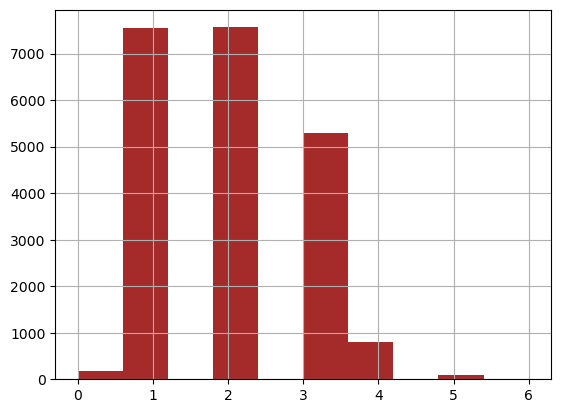

In [37]:
data['rooms'].hist( color = 'brown')

Гистограмма показала, что самое частое количество комнат - 1,2,3.

<Axes: >

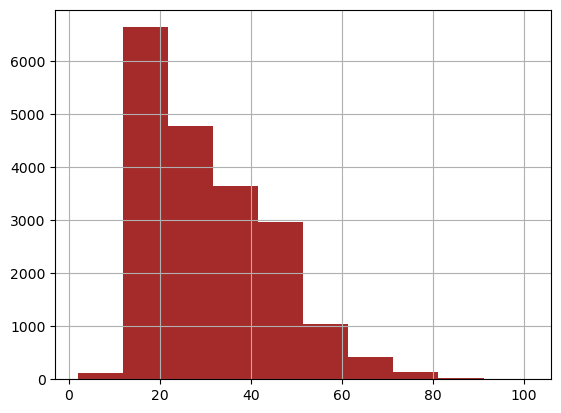

In [38]:
data['living_area'].hist(color = 'brown')

На графике жилой площади видно, что чаще всего в объявлениях встречается жил.площадь в районе от 10 до 20

<Axes: >

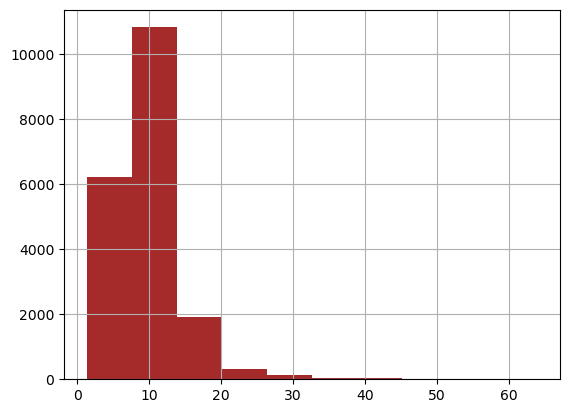

In [39]:
data['kitchen_area'].hist(color = 'brown')

Гистограмма показала, что чаще всего встречается площадь кухни от 10 до 20 м2.

<Axes: >

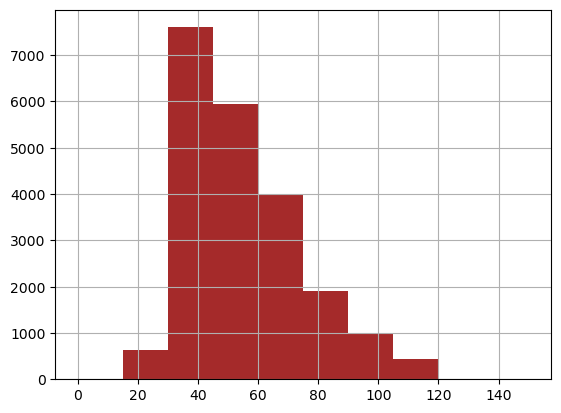

In [40]:
data['total_area'].hist(color = 'brown', range = (0,150))

Гистограмма показала, что самая частая общая площадь - от 30 до 60 кв.м.

<Axes: >

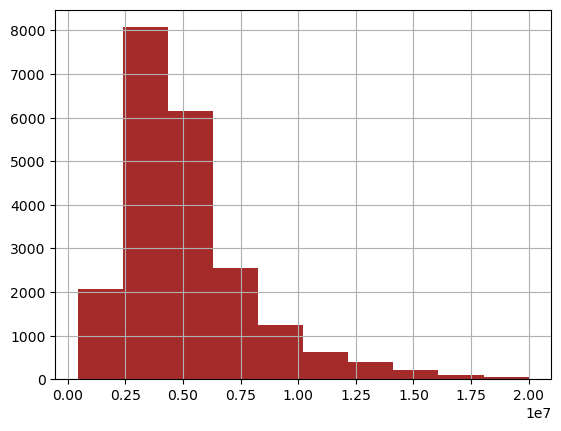

In [41]:
data['last_price'].hist(color = 'brown')

Гистограмма показала, что чаще всего квартиры продаются в ценовом диапазоне от 2.5 до 6млн.руб.

<Axes: >

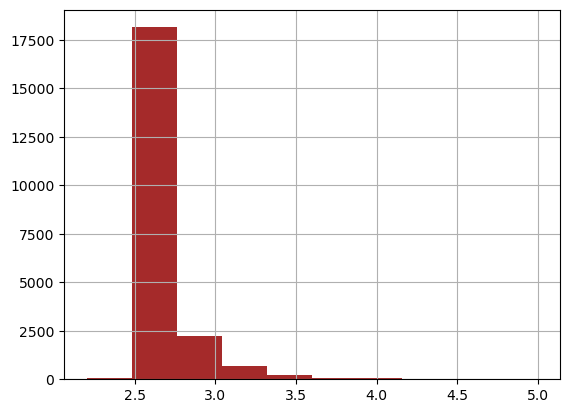

In [42]:
data['ceiling_height'].hist(color = 'brown')

Гистограмма показала, что чаще всего встречаются потолки от 2.5 до 2.7.

<Axes: >

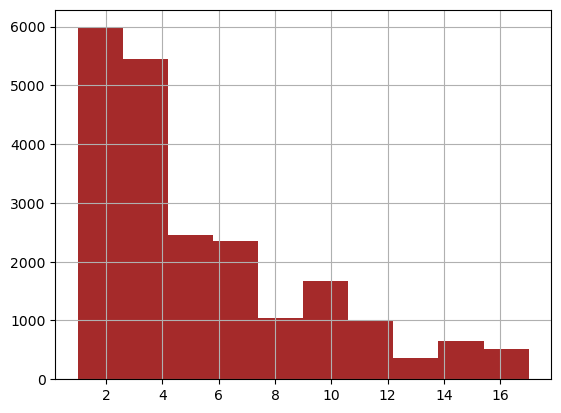

In [43]:
data['floor'].hist(color = 'brown')

Гистограмма показала, что чаще всего встречаются квартиры на этажах 1-4.

<Axes: >

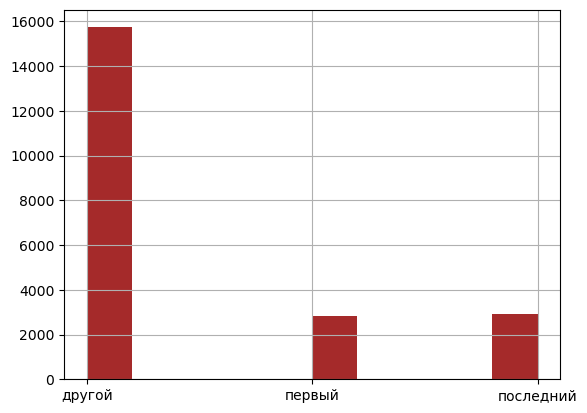

In [44]:
data['type_floor'].hist(color = 'brown')

Гистограмма показала, что чаще всего квартиры продаются на этажах типа "другое". это было очевидно.

<Axes: >

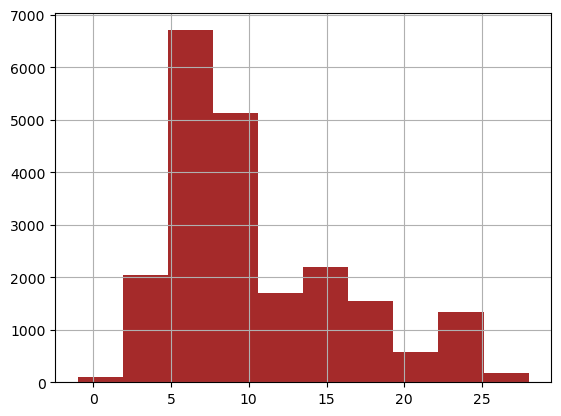

In [45]:
data['floors_total'].hist(color = 'brown')

Гистограмма показала, что чаще всего квартиры продаются в домах с максимальной этажностью 5-7 этажей.

<Axes: >

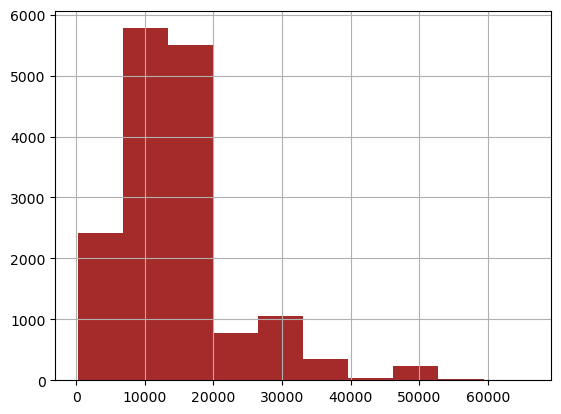

In [46]:
data['cityCenters_nearest'].hist(color = 'brown')

Гистограмма показала, что чаще всего продается недвижимость в удалении от города на 8 - 20 км.

<Axes: >

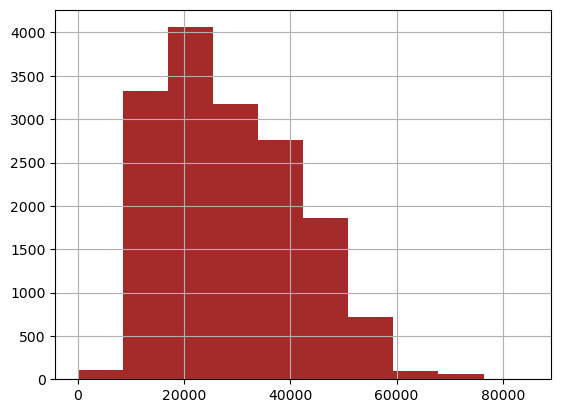

In [47]:
data['airports_nearest'].hist(color = 'brown')

Гистограмма показала, что чаще всего встречаются квартиры с расстоянием до аэропорта 18-23км.

<Axes: >

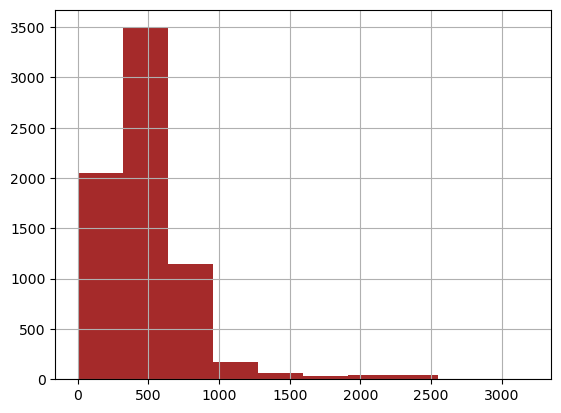

In [48]:
data['parks_nearest'].hist(color = 'brown')

<Axes: >

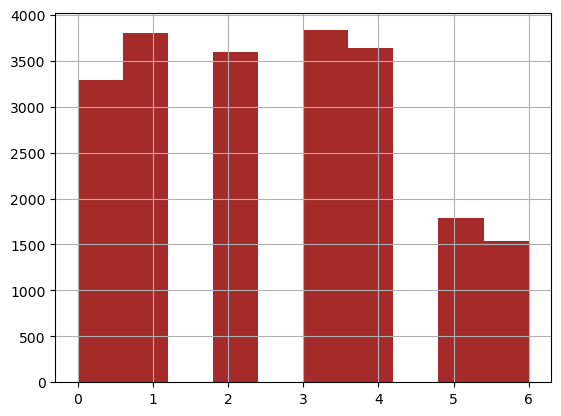

In [49]:
data['day_exposition'].hist(color = 'brown')

Диаграмма показала, что реже всего обьявления выставляются по выходным.

<Axes: >

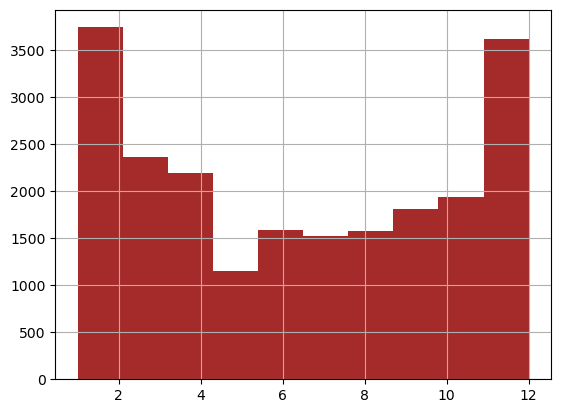

In [50]:
data['month_exposition'].hist(color = 'brown')

Гистограмма выше показала, что в январе и декабре чаще всего люди выставляют недвижимость на продажу.

<Axes: >

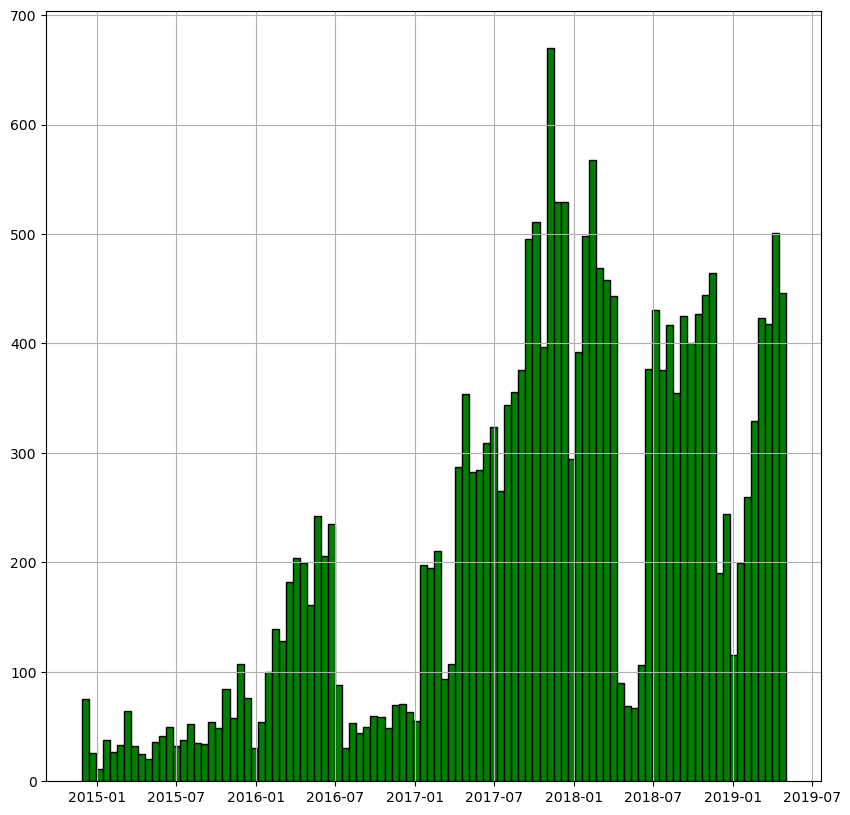

In [51]:
data.first_day_exposition.hist( grid = True, bins = 100, figsize = (10,10),ec = 'black', color = 'green')

На графике заметно, что с 2017 года люди активнее стали пользоваться сервисом. Возможно, большое количество людей решило продать недвижимость после 2017 года, возможно рекламная кампания начала лучше работать в эти годы, и пользователей стало больше.



Теперь расмотрим столбец 'day_exposition'. Важно не забывать, что на значении -1 у нас стоят заглушки от пропусков, которые были созданы, чтобы изменить тип столбца.

In [52]:
data['days_exposition'].describe()

count    21480.000000
mean       152.859683
std        207.735680
min         -1.000000
25%         23.000000
50%         72.000000
75%        194.000000
max       1580.000000
Name: days_exposition, dtype: float64

У нас есть значение - 1580 дней. Думаю, этот человек забыл снять объявление с продажи, поэтому и получился вот такой выброс.

Остальные значения: медиана - 156 дней, третий квартиль 199 дней выглядят реальными.

<Axes: >

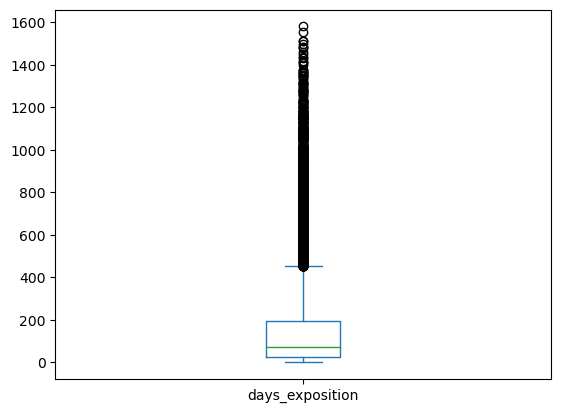

In [53]:
data['days_exposition'].plot(kind = 'box')

Ограничу срок продажи 500 днями, чтобы убрать выбросы.

<Axes: >

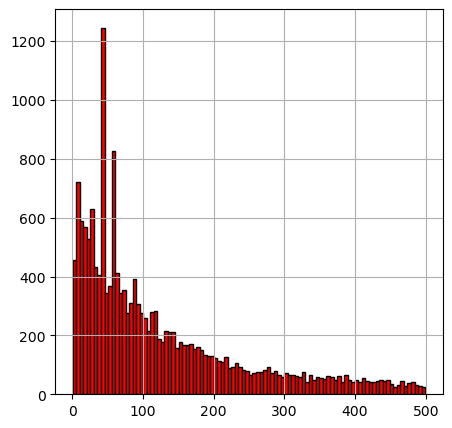

In [54]:
data[(data['days_exposition'] < 500) & (data['days_exposition'] >= 0)]['days_exposition'].hist(ec = 'black', figsize = (5,5), bins = 100, color = 'red')

Вижу странные всплески продаж до 100 дней, увеличу гистограмму.

<Axes: >

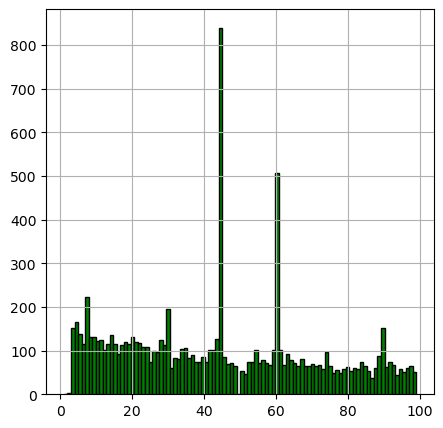

In [55]:
data[(data['days_exposition'] < 100) & (data['days_exposition'] >= 0)]['days_exposition'].hist(ec = 'black', figsize = (5,5), bins = 100, color = 'green')

Какие-то непонятные всплески продаж каждые 2-3 недели. Моя теория заключается в том, что очень часто после продажи квартиры продавцы забывают снимать объявление с продажи, а на сообщения/звонки покупателей не отвечают, поэтому, возможно, раз в 2 недели приходит уведомление:"Вы не отвечаете на сообщения о продаже, закрыть ваше объявление?", и тогда уже продавцы закрывают его. Поэтому и создаются такие большие значения разом.

Посмотрим на высоту потолков.

<Axes: >

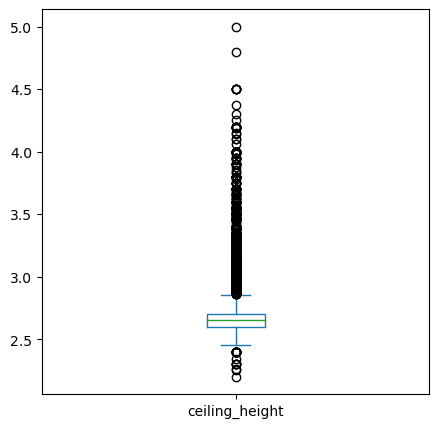

In [56]:
data['ceiling_height'].plot(kind = 'box',figsize = (5,5))

<Axes: >

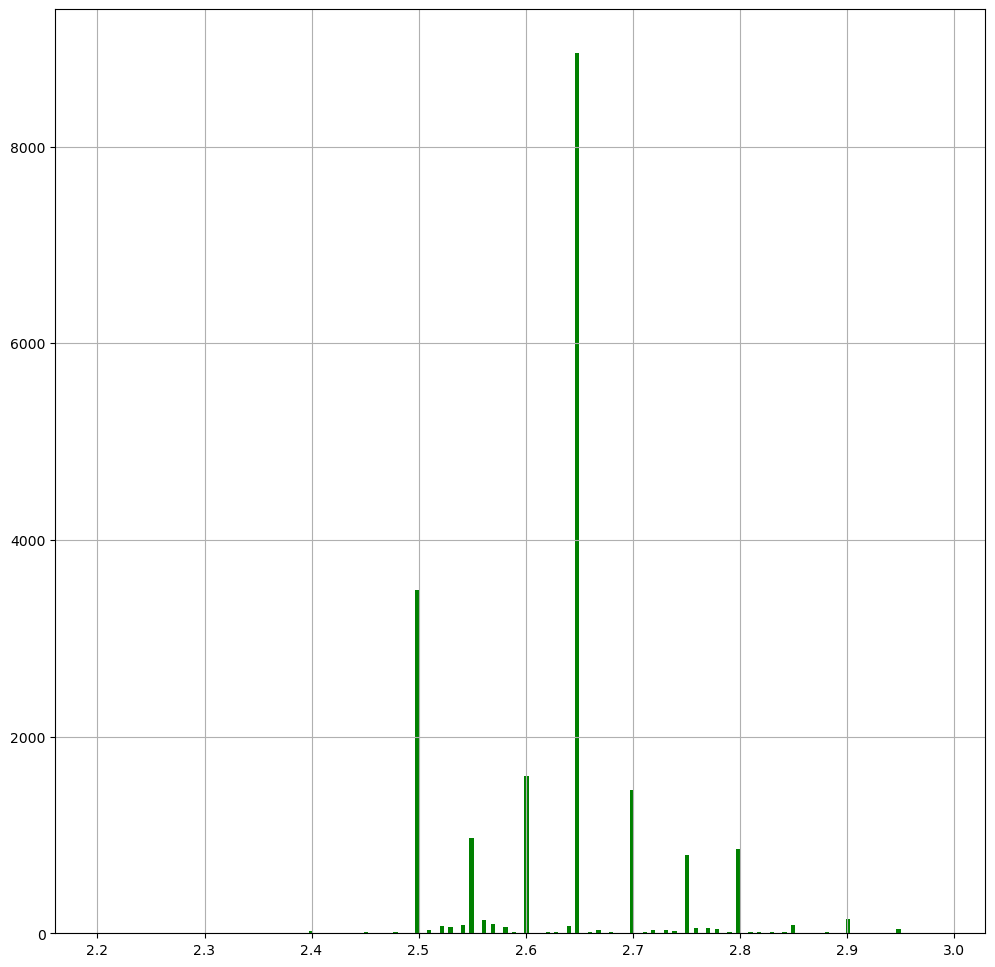

In [57]:
data[data['ceiling_height'] < 3]['ceiling_height'].hist(bins = 200, figsize = (12,12), color = 'green')

Заметно, что самый популярный диапазон от 2,6 до 2,7 метров высоты потолка. Думаю, это действительно реальные цифры.

<Axes: >

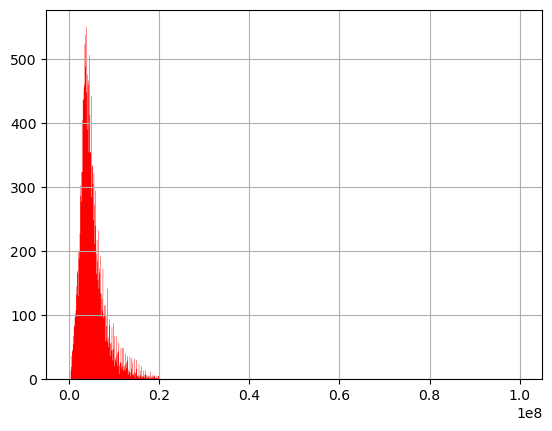

In [58]:
data[data['last_price'] < 100000000]['last_price'].hist(range = (0,100000000), bins = 1000, histtype  = 'stepfilled', color = 'red' )

переходим к цене. На диаграмме заметно, что квартиры продаются чаще всего до 10млн, поэтому посмотрим именно на этот график

<Axes: >

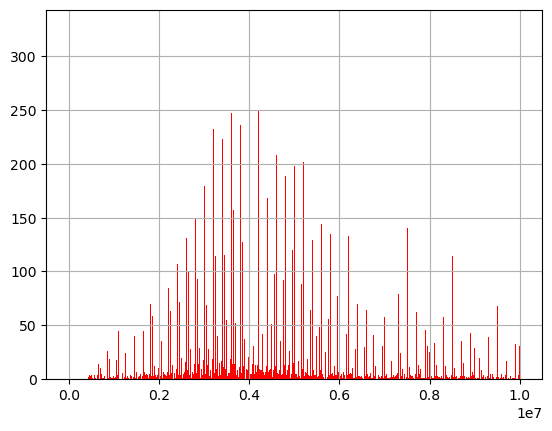

In [59]:
data[data['last_price'] < 10000000]['last_price'].hist(range = (0,10000000), bins = 1000, histtype  = 'bar', color = 'red')

чаще всего квартиры продают от 4 до 5 млн. думаю, это настоящие цифры. Есть выбросы до 100млн, но их мало, думаю, это просто дорогие, большие квартиры в центре.

Переходим к площади.

<Axes: >

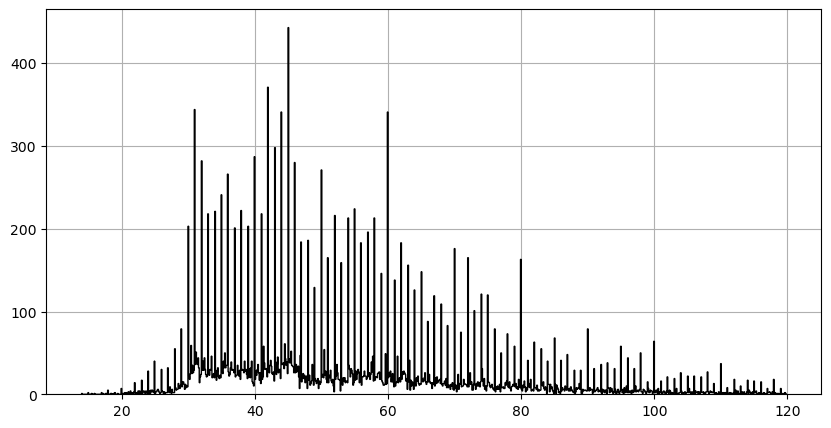

In [60]:
data['total_area'].hist(ec = 'black', bins = 1000, figsize = (10,5), histtype  = 'step')

С выбросами я уже работал, цифры реальные. Основной пик в районе 0-200, увеличим его.

<Axes: >

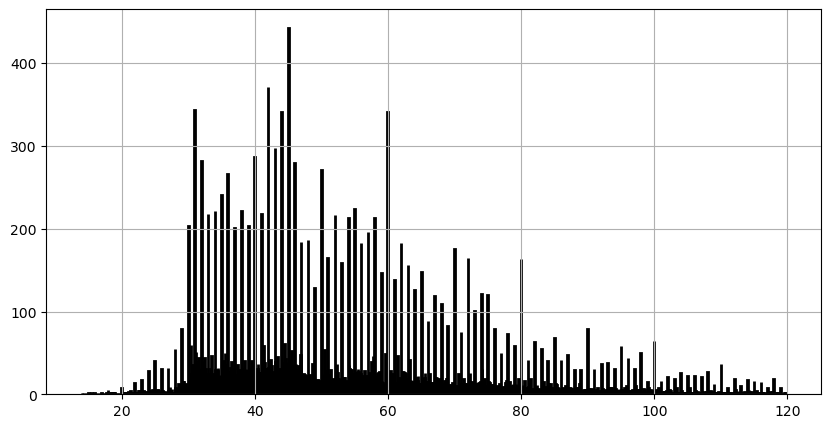

In [61]:
data[data['total_area'] < 200]['total_area'].hist(ec = 'black', bins = 1000, figsize = (10,5), linewidth = 2)

Больше всего значений в районе 30-60. Самый большой пик призходится на +-45 кв.м.

Переходим к комнатам.

In [62]:
data.loc[data['studio'] == True, 'rooms'] = 0
print(data[data['rooms'] == 0]['rooms'].count())

186


Нам нужно не забывать про квартиры-студии, хоть их и очень мало.

<Axes: >

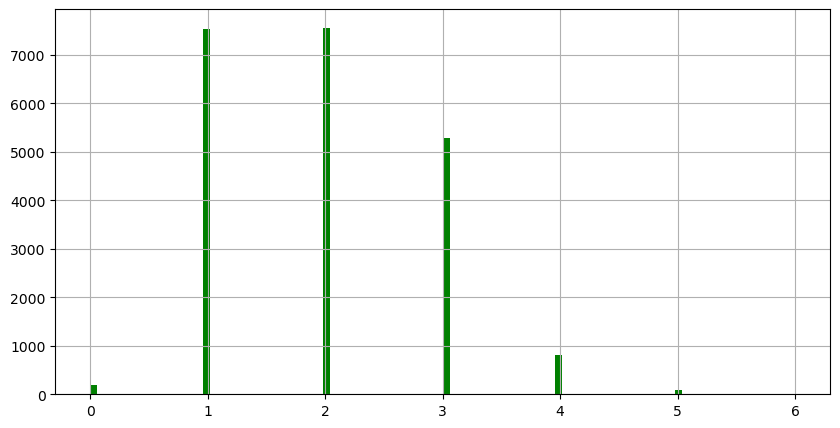

In [63]:
data['rooms'].hist(bins = 100, figsize = (10,5), color = 'green')

Самые частопродаваемые - однушки и двушки. По гистограмме площади могу сказать, что данные взаимосвязанны и сходятся. Там пик от 30 до 60, и тут 1-2 комнаты. 

<div class="alert-info">
<b>ВЫВОД:
    
Двушки и однушки - самая частопродаваемая </b>
</div>


ЗАДАНИЕ 1:
КАК БЫСТРО ПРОДАВАЛИСЬ КВАРТИРЫ

Строим гистограмму для столбца 'days_expostition', НЕ ЗАБЫВАЕМ! что на значениях -1 стоят заглушки!!!

<Axes: >

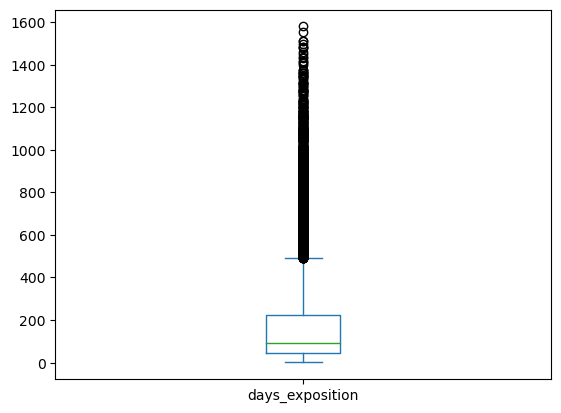

In [64]:
data[data['days_exposition'] >= 0]['days_exposition'].plot(kind = 'box')

<Axes: >

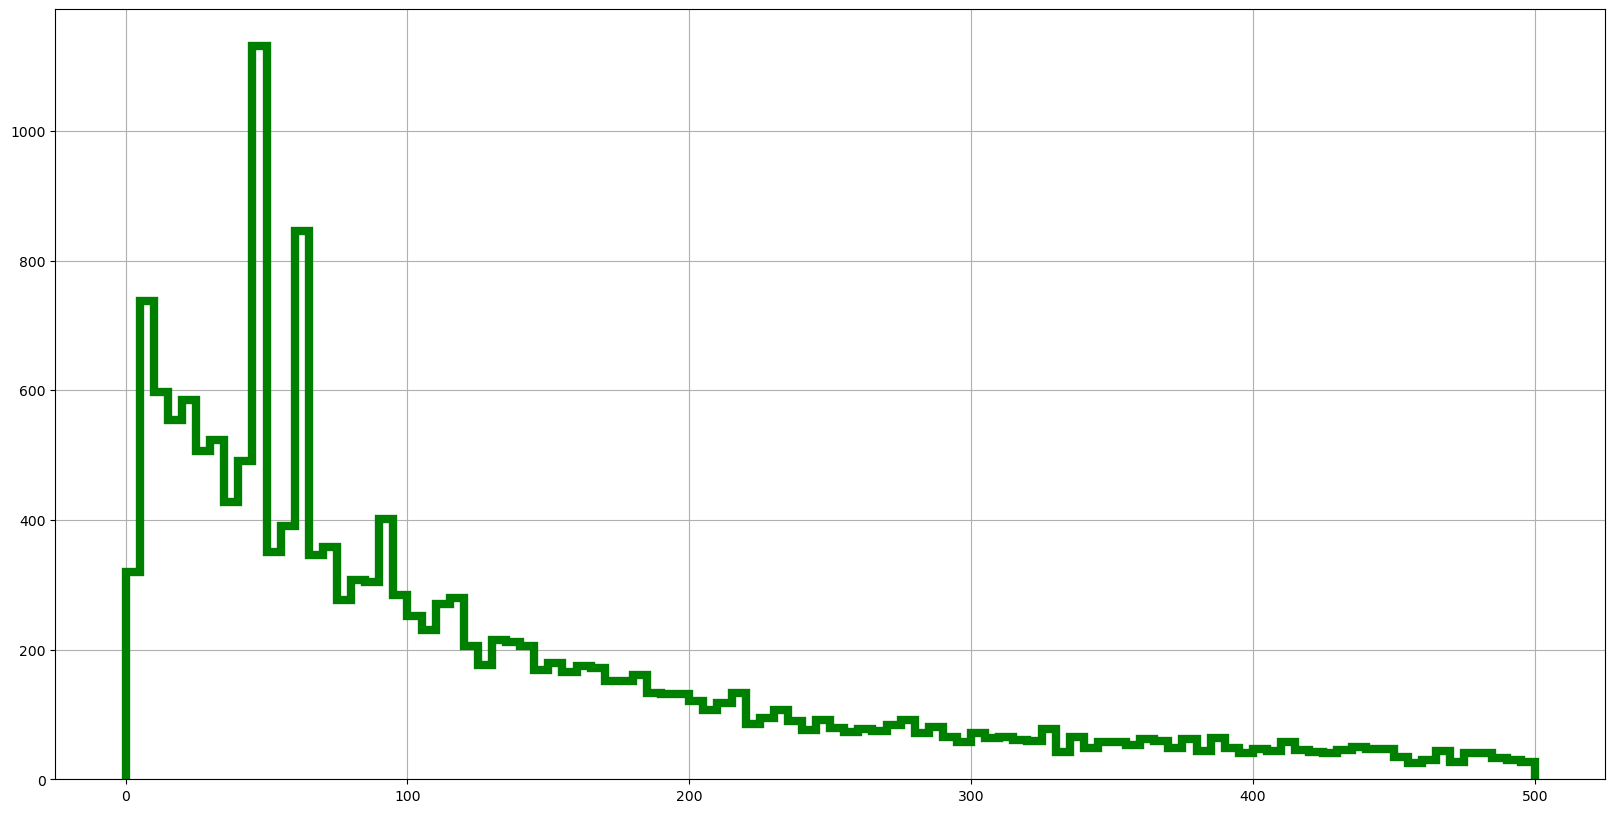

In [88]:
data[data['days_exposition'] >= 0]['days_exposition'].hist(bins = 100, figsize = (20,10), range=  (0, 500), histtype  = 'step', color = 'green', linewidth = 6 )

In [66]:
print(data[(data['days_exposition'] < 500) & (data['days_exposition'] >= 0)]['days_exposition'].mean(), end='')
print(' - среднее значение', end = '\n')
print(data[(data['days_exposition'] < 500) & (data['days_exposition'] >= 0)]['days_exposition'].median(), end ='')
print(' - медиана')
print('Всего продаж -',data[(data['days_exposition'] < 500) & (data['days_exposition'] >= 0)]['days_exposition'].count())

125.28752323420075 - среднее значение
82.0 - медиана
Всего продаж - 17216


Что-то мне подсказывает, что медианному значению можно довериться больше, т.к. оно не берет в себя слишком большие значения, которые попадаются редко, и не берет пиковые значения, а значит - число достовернее, в отличии от среднего. Будем отталкиваться от этого.
    Теперь, зная что 84 - среднее значение, то есть - нормальное время продажи недвижимости, можно считать быструю продажу и необычно долгую.

На гистограмме видно, что после 200 дней (3 квантиль) около 150 продаж, что от общего числа 18521 - невероятно долго. Думаю, 200+ дней на продаже уже можно относить к категории "невероятно долго".

Теперь увеличим график в самом начале, чтобы определить быструю продажу.

<Axes: >

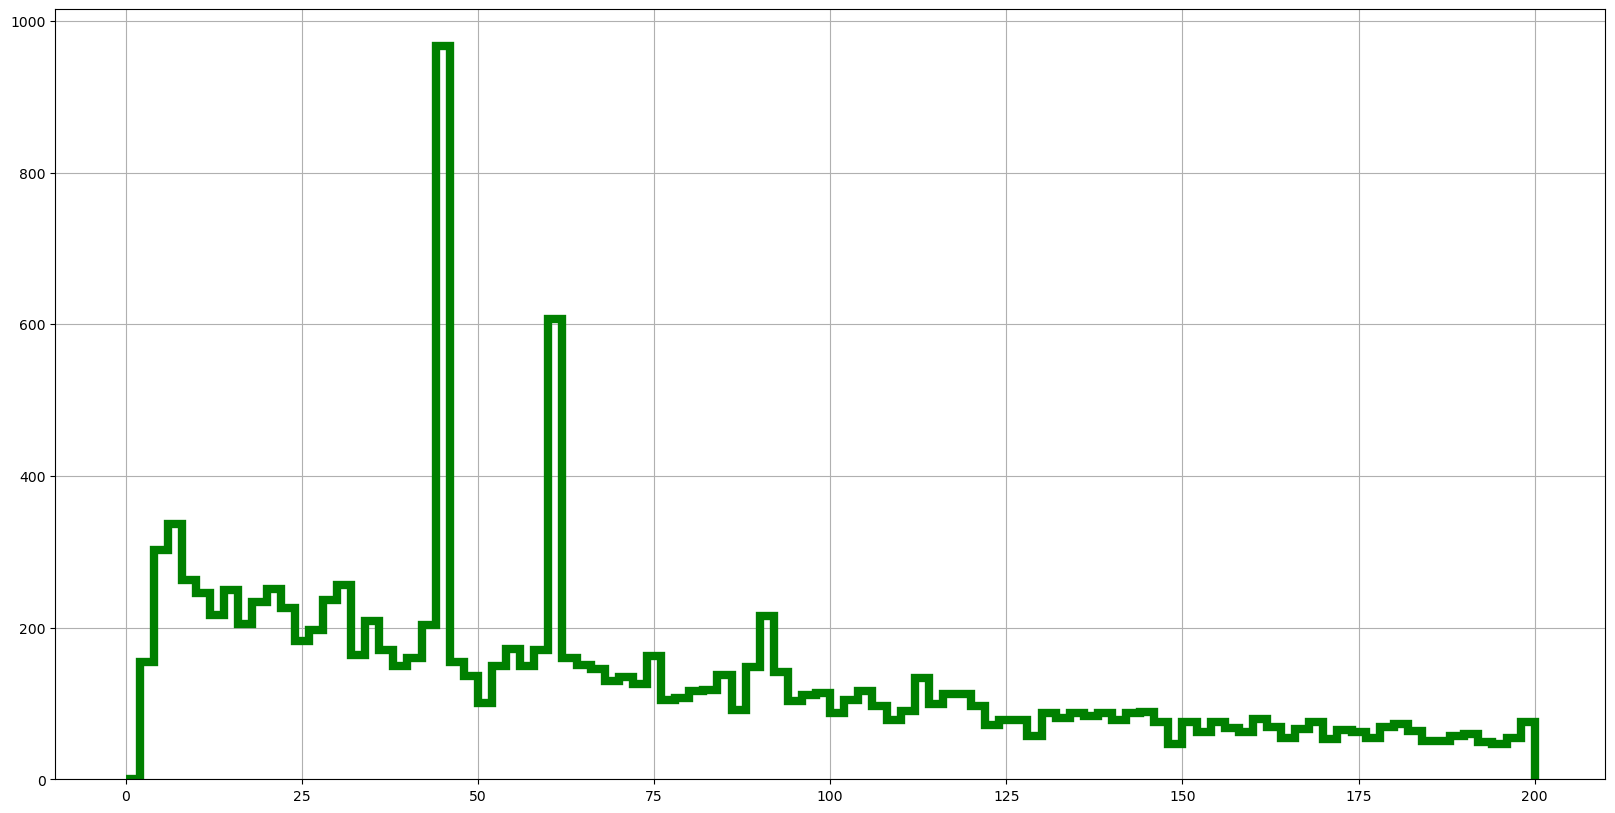

In [87]:
data[data['days_exposition'] >= 0]['days_exposition'].hist(bins = 100, figsize = (20,10), range=  (0, 200), histtype  = 'step', color = 'green', linewidth = 6 )

<Axes: >

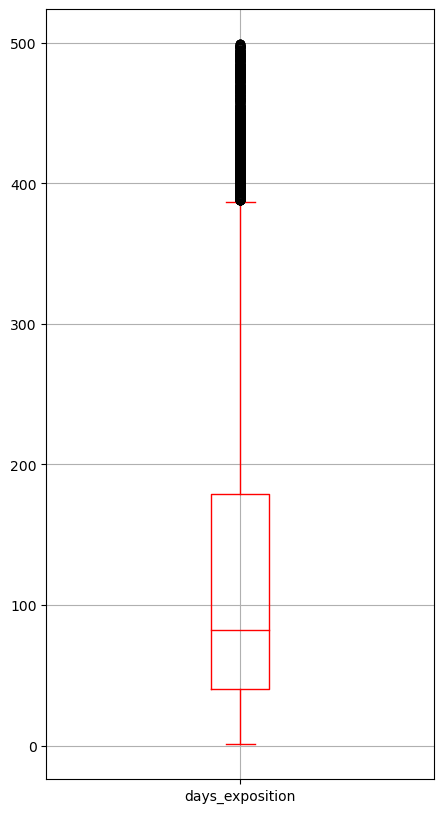

In [68]:
data[(data['days_exposition'] < 500) & (data['days_exposition'] >= 0)]['days_exposition'].plot(kind = 'box', color = 'red', figsize = (5,10), grid = True)

Так как наша нормальная продажа около 84 дней, можно сказать, что 1 квантиль ~45 дней можно считать быстрой продажей.

<div class="alert-info">
<b>ВЫВОД:
    
Я разделил продажи на категории: быстрая, средняя, невероятно долгая. Быстрая - 45 дней, средняя - 84, невероятно долгая - 200. Среднее значение я взял медианное, т.к. оно показывало более реальную картину, в отличие от среднего значения. Остальные категории создавал с помощью анализа гистограмм и "ящика с усами".</b>
</div>

ЗАДАНИЕ 2: Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

Axes(0.125,0.11;0.775x0.77)


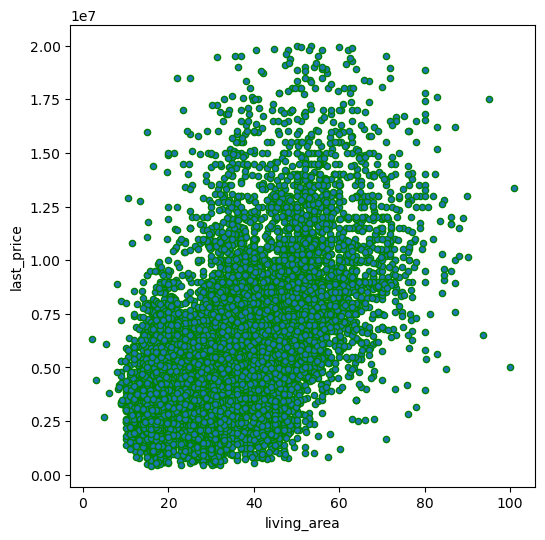

In [69]:
print(data.plot(x = 'living_area', y = 'last_price',kind = 'scatter', figsize = (6,6), ec = 'green'))

На графике видно, что при росте жил.площади растет и цена, следовательно, между ними есть зависимость.

Axes(0.125,0.11;0.775x0.77)


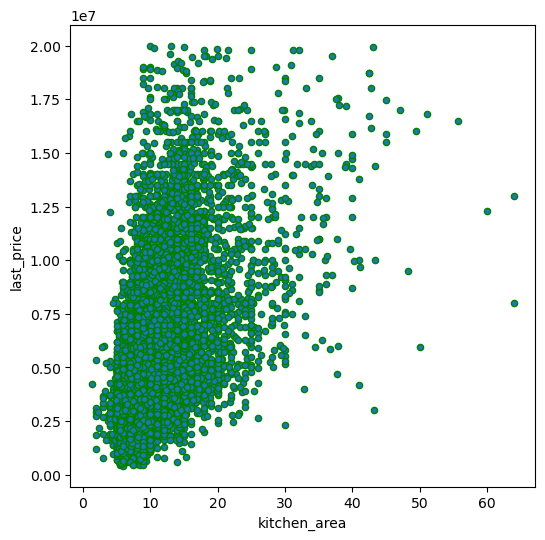

In [70]:
print(data.plot(x = 'kitchen_area', y = 'last_price',kind = 'scatter', figsize = (6,6), ec = 'green'))

На гистограмме видно, что есть зависимость между площадью кухни и ценой продажи. Это было довольно очевидно.

<Axes: xlabel='total_area', ylabel='last_price'>

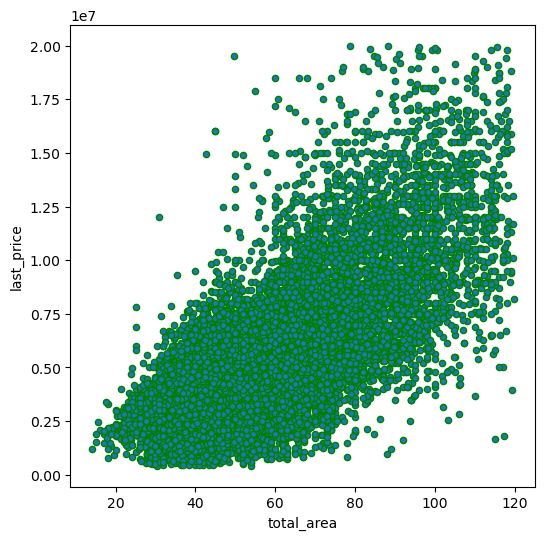

In [71]:
data.plot(x = 'total_area', y = 'last_price',kind = 'scatter', figsize = (6,6), ec = 'green')

На этой гистограмме видно, что при росте общей площади растет и цена. Между ними есть зависимость.

Axes(0.125,0.11;0.775x0.77)


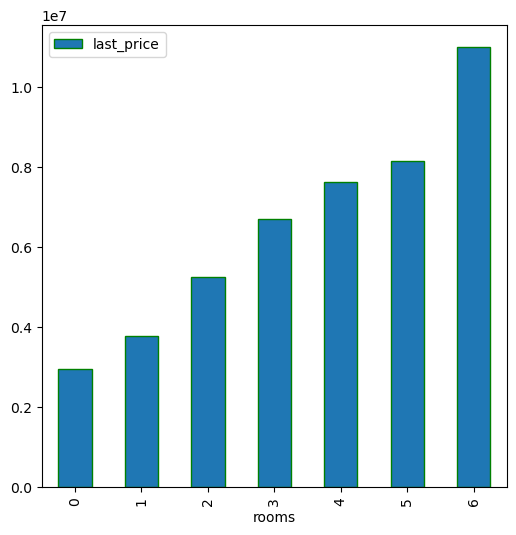

In [72]:
print(data.pivot_table(index = 'rooms', values = 'last_price').plot(kind = 'bar', figsize = (6,6), ec = 'green'))

График показал что-то непонятное. Посмотрим на выбросы:

<Axes: >

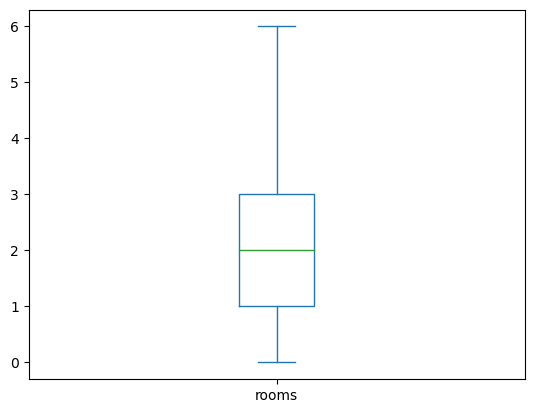

In [73]:
data['rooms'].plot(kind = 'box')

Посмотрим на график без выбросов:

Axes(0.125,0.11;0.775x0.77)


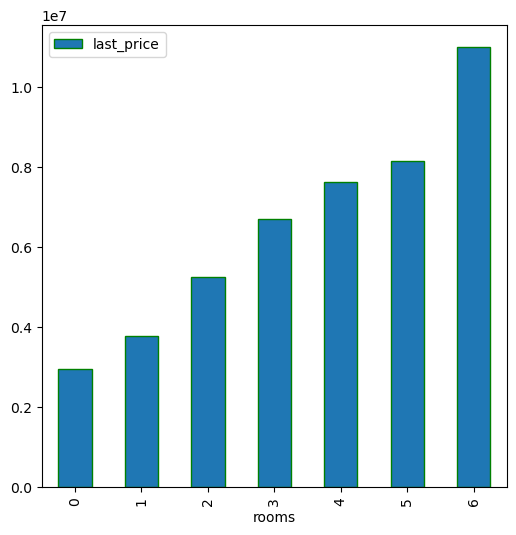

In [74]:
print(data.pivot_table(index = data[data['rooms'] <= 7]['rooms'], values = 'last_price').plot(kind = 'bar', figsize = (6,6), ec = 'green'))

Теперь зависимость видна. Вывод: наблюдается зависимость между ценой продажи и количеством комнат. Это тоже было очевидно.

In [75]:
pt = data.pivot_table(index = 'type_floor', values = 'last_price')

<Axes: xlabel='type_floor'>

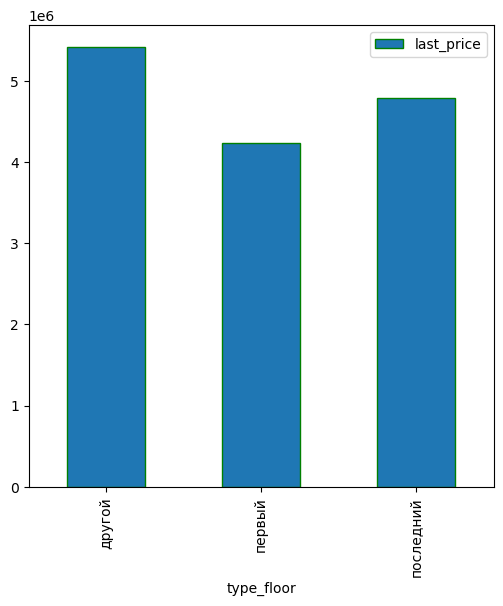

In [76]:
pt.plot(kind = 'bar', figsize = (6,6), ec = 'green')

По столбчатой гистограмме видно, что тип этажа связан с ценой - первые этажи значительно дешевле остальных. Меня удивило, что последний этаж стоит дороже остальных категорий. Я пытался найти какую-либо ошибку в проделанных выше данных, тк мне показалось это неправильным, но ничего не нашел. Поэтому я списал это на то, что люди любят квартиры с видом, а Санкт-Петербург довольно красивый город, поэтому люди и рвутся покупать квартиры повыше, с лучшим видом.

Axes(0.125,0.11;0.775x0.77)


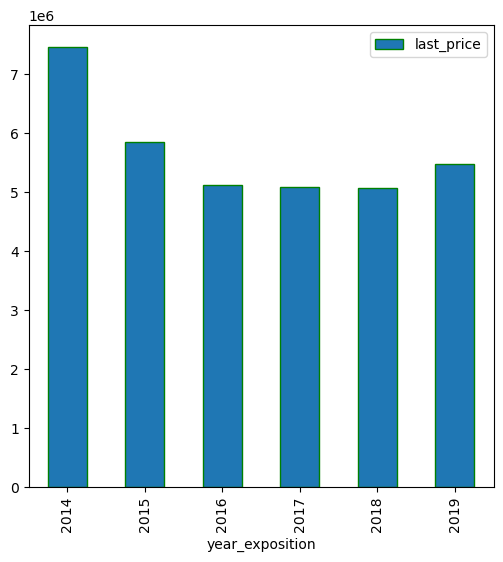

In [77]:
print(data.pivot_table(index = 'year_exposition', values = 'last_price').plot(kind = 'bar', figsize = (6,6), ec = 'green'))

Действительно, с 2014 по 2018 цена продажи недвижимости падала! Зависимость есть.

Axes(0.125,0.11;0.775x0.77)


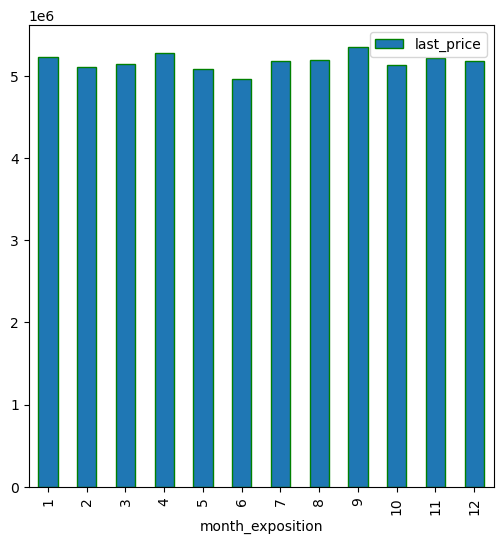

In [78]:
print(data.pivot_table(index = 'month_exposition', values = 'last_price').plot(kind = 'bar', figsize = (6,6), ec = 'green'))

Axes(0.125,0.11;0.775x0.77)


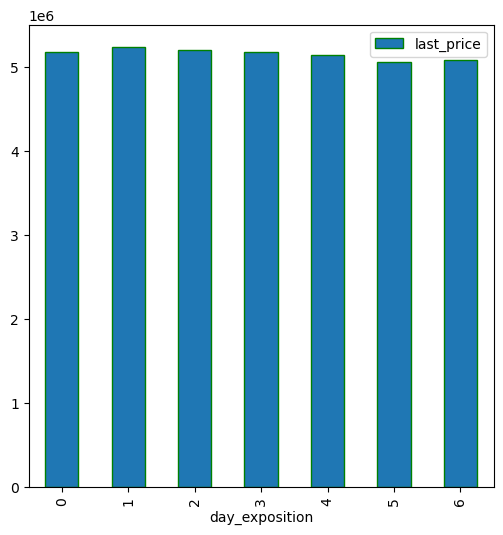

In [79]:
print(data.pivot_table(index = 'day_exposition', values = 'last_price').plot(kind = 'bar', figsize = (6,6), ec = 'green'))

Из гистограмм выше заметно, что день и месяц не зависим с ценой продажи, в отличие от года продажи.

Теперь я построю heatmap корелляции со всеми столбцами:

Цена за метр, общая площадь, жилая площадь действительно имеют высокий коэффициент корреляции! Успех!

<div class="alert-info">
<b>ВЫВОД:
    
Используя сводные таблицы, построив  гистограммы, ящики с усами, я узнал, что существует зависимость между годом размещения, жил.площадью, общей площадью, типом этажа, площади кухни и количеством комнат.</b>
</div>

ЗАДАНИЕ 3:"Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

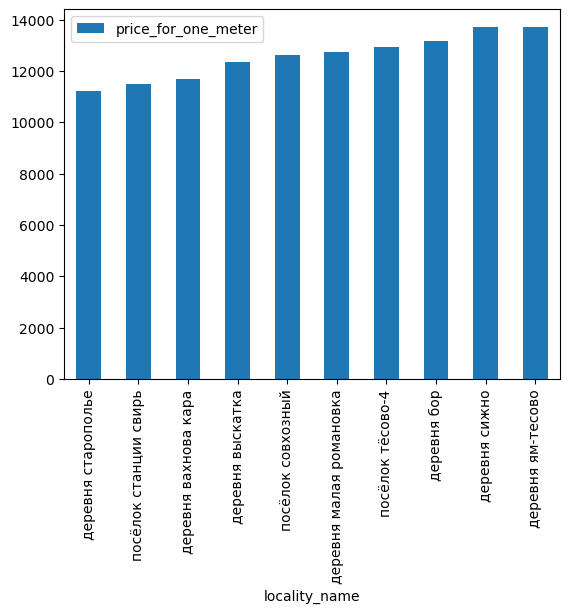

In [80]:
name_price = data.pivot_table(index = 'locality_name', values = 'price_for_one_meter').sort_values(by = 'price_for_one_meter').head(10).plot(kind = 'bar')

На этой гистограмме указаны населенные пункты с самой дешевой ценой за квадратный метр.

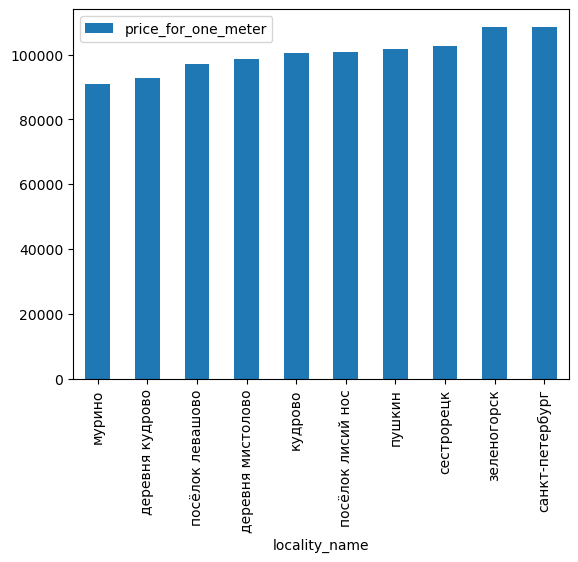

In [81]:
name_price = data.pivot_table(index = 'locality_name', values = 'price_for_one_meter').sort_values(by = 'price_for_one_meter').tail(10).plot(kind = 'bar')

На гистограмме выше указаны населенные пункты с самой высокой ценой за квадратный метр. Теперь хочу побывать в Зеленогорске ;)

<Axes: xlabel='locality_name'>

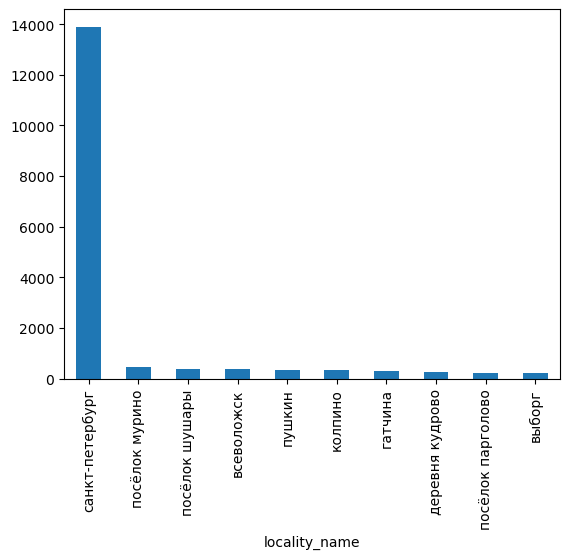

In [82]:
data['locality_name'].value_counts().head(10).plot(kind = 'bar')

<Axes: xlabel='locality_name'>

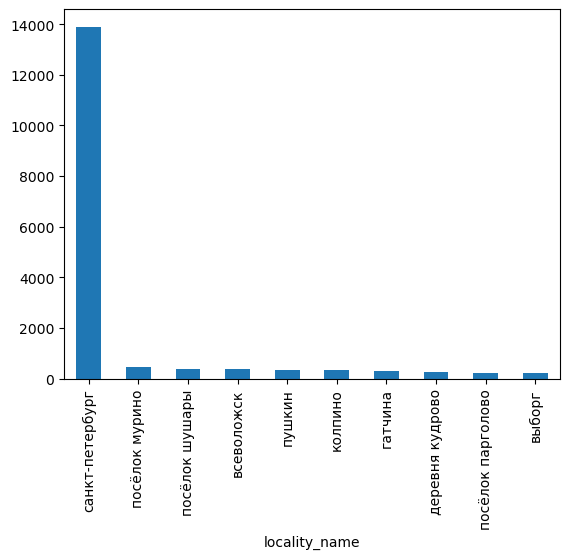

In [83]:
data['locality_name'].value_counts().head(10).plot(kind = 'bar')

Выше показаны населенные пункты с самым большим количеством объявлений. Санкт-Петербург несомненно лидирует!

Теперь посмотрим на их цены за квадратный метр:

In [84]:
names = ['санкт-петербург', 'посёлок мурино','посёлок шушары','всеволожск','пушкин','колпино','посёлок парголово','гатчина','деревня кудрово','выборг']
for name in names:
    print(name, data[data['locality_name'] == name]['price_for_one_meter'].mean(),'тыс.рублей за кв.метр')

санкт-петербург 108523.7040438932 тыс.рублей за кв.метр
посёлок мурино 85378.45397154543 тыс.рублей за кв.метр
посёлок шушары 78334.89952041737 тыс.рублей за кв.метр
всеволожск 67240.08205049977 тыс.рублей за кв.метр
пушкин 101881.54367660351 тыс.рублей за кв.метр
колпино 75407.28263288841 тыс.рублей за кв.метр
посёлок парголово 88845.56912327983 тыс.рублей за кв.метр
гатчина 68926.9042616345 тыс.рублей за кв.метр
деревня кудрово 92723.0692195543 тыс.рублей за кв.метр
выборг 58328.819091896374 тыс.рублей за кв.метр


Несомненно, в Санкт-Петербурге самая высокая цена за кв.м - 114 тыс.руб., после него - Пушкин. Дешевле всего из нашего топ-10 можно купить недвижимость за 1 кв.м. в Выборге - всего 58тыс. руб.

<div class="alert-info">
<b>ВЫВОД:
    
Используя сводные таблицы я выявил самые дешевые и дорогие населенные пункты в Лен.области за кв.м. Также посчитал топ-10 пунктов по количеству объявлений и выявил самые дорогие и дешевые из этого списка. Самый дорогостоящий кв.м. в Зеленогорске из всех населенных пунктов, дешевый - Мурино. 
    
Из топ-10 по количеству обьявлений самый дорогостоящий кв.м. в Питере, дешевый - Выборг</b>
</div>

ЗАДАНИЕ 4: Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

Axes(0.125,0.11;0.775x0.77)


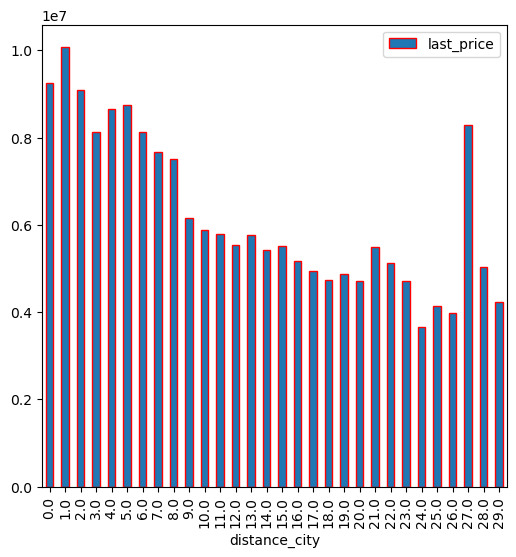

In [85]:
data_spb = data[data['locality_name'] == 'санкт-петербург']#создаем датасет только с СПБ
print(data_spb.pivot_table(index = 'distance_city', values = 'last_price').sort_values(by = 'distance_city', ascending = True).plot(kind = 'bar', figsize = (6,6), ec = 'red'))


На общей гистограмме выше видно, что тенденция графика - вниз, следовательно, чем больше удаленность от города - цена ниже. Есть отдельные выбросы, думаю, это из-за того, что в Лен.области есть элитные районы, которые не считаются центральными.

Считаем цену за кв.км:

/var/folders/yr/04d7xw_d5610csnyxxj8t5p40000gn/T/ipykernel_18989/2212429792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest']/1000
/var/folders/yr/04d7xw_d5610csnyxxj8t5p40000gn/T/ipykernel_18989/2212429792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].fillna(999999)
/var/folders/yr/04d7xw_d5610csnyxxj8t5p40000gn/T/ipykernel_18989/2212429792.py:3: SettingWithCo

,price_for_one_meter
cityCenters_nearest_km,
0,128507.291985
1,131606.552522
2,121445.820077
3,118541.644522
4,128567.881337
5,127577.845297
6,126750.840081
7,123955.641311
8,115780.726789


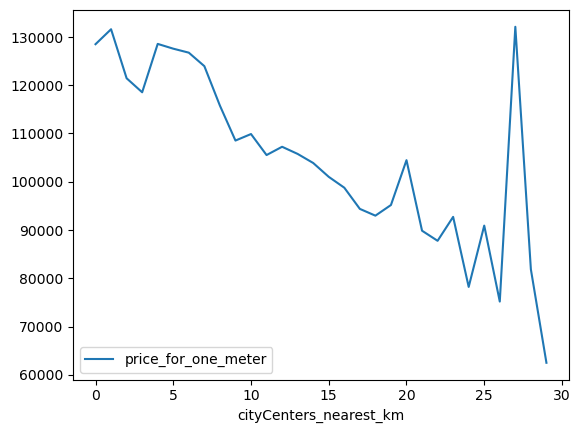

In [86]:
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest']/1000
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].fillna(999999)
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].astype('int')
pivot_table_km = data_spb[data_spb['cityCenters_nearest_km'] != 999999].pivot_table(index = 'cityCenters_nearest_km', values = 'price_for_one_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

Видим, что есть странный пик в райне 26км. Думаю, это и есть элитные районы, которые вдали от центра.

<div class="alert-info">
<b>ВЫВОД:
    
    
Я вычислил среднюю цену каждого километра по мере удаления от центра города. Сделал гистограмму зависимости цены и центра города и выявил зависимость между ценой и расстоянием от центра в районе города.</b>
</div>

### Общий вывод

Выполняя проект я проделал большую работу как по предобработке, так и анализе данных. В этапе предобработки данных я определил пропуски, заполнил их, затем занялся типами столбцов, приступил к неявным дубликатам - выявил и устранил их, затем занялся аномальными значениями, после чего я приступил к анализу. В ходе анализа я добавлял промежуточные столбцы, которые давали быстрый и удобный доступ к информации, а также использовались в дальшейших построениях гистограмм и сводных таблиц. Я изучил, как быстро продавались квартиры, какие факторы влияют на стоимость недвижимости в зависимости от определенных параметров. Посчитал среднюю цену одного кв.м. Определил - есть ли зависимость между расстоянием от города и ценой, посчитав цену за каждый километр удаления от центра.

Мои выводы показали, что с 2017 года люди стали пользоваться сервисом активнее - объявлений стало больше как минимум в 2 раза по сравнению 2016 с 2017. В среднем эти объявления закрываются за 84 дня. 

Самая ходовая высота потолков в области: 2.6 - 2.7 м. С такой высотой примерно 33% объявлений.

Анализ показал, что главная зависимость параметров квартиры и цены - общая площадь. Также наблюдалась зависимость между количеством комнат, типом этажа, годом размещения. Последняя зависимость показала, что в 2014 квартиры продавались по цене в 1.5 - 2 раза выше, чем в остальные годы.

Я определил поселки с самой дешевой и дорогой ценой за кв.м - Деревня Ставрополье и Зеленогорск соответственно. Также выделил из топ 10 по количеству продаж населенные пункты с этими же характеристиками - Дороже всего в Санкт-Петербурге, дешевле - Выборг.

Провел анализ с удаленностью от центра города, который показал, что по мере удаления от города, цена падает, но есть определенные выбросы, которые связаны с элитными поселками вдали от центра города.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод